# Homophily-structured prior on a social kernel

## Introduction

Our aim is to infer the social kernel block matrix $\Lambda$, which is a $k\times k$ symmetric non-negative valued matrix such that the likelihood of nodes from block $u$ to connect to nodes from block $v$ is given by $\Lambda_{uv}$. Inference here can assume a variety of structured forms of the kernel, so as to infer the block matrix from aggregate link data:

1. **No structure/unstructured** kernel would entail only assuming the minimal requirement of positive entries in $\Lambda$.
2. **Homophily-structured** kernel would entail assuming a form of $\Lambda$ that enforces homophily, i.e. nodes connect to other nodes that are "similar" to them with a higher likelihood.
3. **Parametrically-structured** kernel would entail assuming a parametric form of the kernel that reduces the *degrees of freedom* from $k(k+1)/2$ to fewer parameters.

***Combining structures.*** We remark that these options are not mutually exclusive and can be used together. For instance, if there are $d$ observed Blau dimensions (gender, age, ethnicity, and so on), each with $k_i$ groups such that $k=\prod_{i=1}^dk_i$, then one can assume the social kernel factorizes over the Blau space such that $\Lambda=\bigotimes_{i=1}^d\Lambda^i$, where $\Lambda^i$ is the $k_i\times k_i$ symmetric non-negative valued block matrix corresponding to each Blau dimension, and $\bigotimes$ is the Kronecker product. This parametric structure reduces the degrees of freedom from $\frac{\left(\prod_ik_i\right)\left[\left(\prod_ik_i\right)+1\right]}{2}$ to $\sum_i\frac{k_i(k_i+1)}{2}$, while each block matrix $\Lambda^i$ can be assumed to be unstructured *or* homophily-structured.

***Logistic kernel as a parametric homophilous structure.*** Another example of a parametric structure would be to assume that the block matrix $\Lambda$ is a "planted partition" wherein every diagonal element is $\lambda_\mathrm{in}$ and off-diagonal element is $\lambda_\mathrm{out}$. This reduces the number of parameters down to just $2$. Alternatively, the planted partition structure can be combined with the Kronecker structure to yield parameter pairs $\{\lambda^i_\mathrm{in}, \lambda^i_\mathrm{out}\}_{i=1}^d$, i.e. a total of $2d$ parameters. In the case of discrete Blau dimensions, this planted-partition-Kronecker structure can be shown to be asymptotically equivalent to the Logistic connectivity kernel for sparse graphs (with $O(n)$ edges). Thus, one can simply assume an underlying parametric (Logistic) kernel. We show later how assuming $\lambda^i_\mathrm{in}\ge \lambda^i_\mathrm{out}$ will also enforce homophily, which can be readily incorporated in the Logistic kernel by constraining the growth parameter to be negative.

Since enforcing homophily is expected to vastly constrain the posterior distribution, which can help learn the social kernel from aggregated link data, here we develop appropriate homophily-enforcing priors for the social kernel, without assuming an underlying parametric form.

## What does it mean to be "homophilous"?

The definition of homophily, nodes connect to other "similar" nodes with a higher probability, gives some intuition to how parameters of the block matrix must be constrained under a homophilous kernel. One immediate observation is that every off-diagonal element $\Lambda_{uv}$ must be no larger than the geometric mean of corresponding diagonal elements $\Lambda_{uu},\Lambda_{vv}$ ($u\ne v$), for if not then that immediately violates the assumption of homophily. However, as we show below, this is a *necessary* condition for homophily, but not *sufficient*.

\begin{align}
\textrm{Homophily}\implies \forall u,\forall v(\ne u): \Lambda_{uv}\le \sqrt{\Lambda_{uu}\Lambda_{vv}}.\label{eq:homophily_implication}\tag{1}
\end{align}

***Defining homophily.*** We make the notion of homophily more precise. Consider the eigendecomposition of the symmetric block matrix $\Lambda=Q\Gamma Q^T$ where columns of $Q$ refer to the (orthonormal) eigenvectors of $\Lambda$ and $\Gamma$ is a diagonal matrix encoding the corresponding eigenvalues. Then we can write $\Lambda_{uv}=\sum_{i=1}^k\Gamma_{ii}Q_{ui}Q_{vi}$. For a non-negative (irreducible) matrix, the Perron-Frobenius theorem tells us that the largest eigenvalue and the corresponding (Perron) eigenvector are non-negative, and none of the other eigenvectors have all positive/negative components. Effectively, the contribution of the Perron eigenvector to $\Lambda_{uv}$ is always non-negative. However, the contribution of other eigenvectors can be non-negative *or* negative, depending on the sign of the eigenvalue $\Gamma_{ii}$, and if $\mathrm{sgn}(Q_{ui})=\mathrm{sgn}(Q_{vi})$ (where $\mathrm{sgn}(\cdot)$ is the sign function). Thus, $\mathrm{sgn}(Q_{ui})\mathrm{sgn}(Q_{vi})$ is indicative of similarity of blocks $u,v$ along the $i$th eigenvector if it is $1$, and dissimilarity if it is $-1$. If $\Gamma_{ii}\ge 0$, then similarity yields a non-negative contribution to $\Lambda_{uv}$, i.e. *homophily*. (Here, we permit zero eigenvalues which trivially do not contribute to $\Lambda$.) If $\Gamma_{ii}<0$, then similarity yields a negative contribution to $\Lambda_{uv}$, i.e. *heterophily*. Therefore, a "homophily-enforcing" block matrix is one which has non-negative eigenvalues, i.e. it is positive semi-definite (or non-negative definite).

\begin{align}\label{eq:def_homophily_psd}
\textrm{Homophily}\iff\Lambda\textrm{ is positive semi-definite}\tag{2}
\end{align}

To see the implication in Eq. \ref{eq:homophily_implication}, we apply the Cauchy-Schwarz inequality to $\Lambda_{uv}$:
\begin{align}
\Lambda_{uv}&=\sum_i\Gamma_{ii}Q_{ui}Q_{vi}\\
&=\sum_i\left(\sqrt{\Gamma_{ii}}Q_{ui}\right)\left(\sqrt{\Gamma_{ii}}Q_{vi}\right)\\
&\le \sqrt{\sum_i\left(\Gamma_{ii}Q_{ui}^2\right)\sum_i\left(\Gamma_{ii}Q_{vi}^2\right)}\\
&=\sqrt{\Lambda_{uu}\Lambda_{vv}},
\end{align}
where we use the fact that eigenvalues $\Gamma_{ii}$ are non-negative. We later show that the condition is not sufficient by the way of a counterexample, which will be relevant to trading-off between strict homophily constraints and maintaning unproblematic posteriors.

***Variance-correlation decomposition.*** We note that Eq. \ref{eq:homophily_implication} also serves to motivate the definition of the social Gini index with the *self-affinity* null model, i.e. $\zeta_\mathrm{self}$ in the [document](https://www.overleaf.com/read/vdbggyrjkdkv). In fact, instead of considering a Sinkhorn-type decomposition (which worked well to motivate the *mean-affinity* null model), we can pursue a variance-correlation type decomposition of the social kernel $\Lambda$, which can now be seen as a (positive semi-definite) "covariance matrix":
$$\Lambda=V\Omega V,$$
where $V$ is a diagonal matrix indicating square root of self-affinities (akin to "standard deviations"), $\Omega$ is a non-negative valued "correlation matrix" that enforces homophily and encode affinities relative to self-affinities. This formulates the problem of inferring a homophilous social kernel as the inference of a covariance structure, *with the additional condition that the covariances (and thus correlations) be non-negative*. Separate priors can then be imposed on the diagonal matrix $V$, and on the correlation matrix $\Omega$, to aid inference. And the sample of $\Omega$ directly feed into the definition of social Gini $\zeta_\mathrm{self}$.

***Homophily in the planted-partition Kronecker structure.*** From the so-defined planted-partition Kronecker structure, the eigenvalues of block matrix for each dimension is given by $\gamma^i_\pm=\lambda^i_\mathrm{in}\pm\lambda^i_\mathrm{out}$. The eigenvalues of the whole block matrix $\Lambda$ are given by the combination of products of eigenvalues $\gamma_{j_1}^1\gamma_{j_2}^2\cdots\gamma_{j_d}^d$. Given Eq. \ref{eq:def_homophily_psd}, for $\Lambda$ to be positive semi-definite, all eigenvalues must be non-negative, therefore $\forall i: \lambda^i_\mathrm{in}\ge\lambda^i_\mathrm{out}$ to enforce homophily.

## Sampling non-negative correlation matrices for homophilic social kernels

We focus the rest of this notebook on sampling and inference of $\Omega$. As far as I can tell, there are no established distributions over non-negative correlation matrices.

***LKJ distribution.*** Our starting point is to use a pre-existing distribution over correlation matrices, namely the [LKJ distribution](http://dx.doi.org/10.1016/j.jmva.2009.04.008). This has the advantage of defining a distribution over correlation matrices $C$ that is proportional to $\mathrm{det}(C)^{\eta-1}$, with the expectation given by the identity matrix. The determinant of a correlation matrix is indicative of the amount of spread, and conditioned on that all matrices are sampled with equal probability. For $\eta=1$, the distribution is "uniform" over the space. For large values of $\eta$, the distribution becomes increasingly concentrated around the identity matrix. That is, roughly speaking, large values of $\eta$ impose larger homophily in the prior. The opposite is true for $\eta<1$. We use the LKJ distribution as the foundation to develop 3 (*really* just 2) ideas of sampling non-negative "correlation" matrices.

***Partial correlations yield full correlation structure.*** The LKJ method is a recursive strategy that samples a full correlation matrix by recursively sampling elements of the partial correlation matrix. Each partial correlation is independently beta-distributed over $[-1,1]$, with symmetric parameters that depend on $\eta, k$ and the row index $r$ of the matrix being filled. Use of this appropriately parametrised beta distribution yields the proportionality to $\mathrm{det}(C)^{\eta-1}$. Although there is an *ordering* to the filling up of the correlation matrix, as per some "regular vine", the independence of partial-correlations in a regular vine generated by the beta distribution renders the distribution as permutation invariant.

The LKJ distribution is implemented in `stan`, but we create our own LKJ distribution object to extend it to *non-negative* correlation matrices.

In [1]:
%matplotlib inline

First, we define a (univariate) beta distribution over $[-1,1]$, while allowing for truncation to some $[\mathrm{clip_a},\mathrm{clip_b}]$ such that $-1\le \mathrm{clip_a}\le\mathrm{clip_b}\le 1$. (This truncation will be useful later.)

In [649]:
from scipy.stats import rv_continuous, beta

class truncbeta_gen(rv_continuous):
    # defines a truncated beta distribution over [clip_a, clip_b], where the original beta distribution is defined over [-1,1]
        
    def _argcheck(self, a, b, clip_a, clip_b):
        return (a > 0) & (b > 0) & (clip_a >= -1) & (clip_b <= 1) & (clip_a <= clip_b)
    
    def _get_support(self, a, b, clip_a, clip_b):
        return clip_a, clip_b
    
    def _beta_cdf(self, x, a, b): return beta.cdf(x, a, b, loc=-1, scale=2)
    
    def _beta_pdf(self, x, a, b): return beta.pdf(x, a, b, loc=-1, scale=2)
    
    def _beta_ppf(self, x, a, b): return beta.ppf(x, a, b, loc=-1, scale=2)
    
    def _cdf(self, x, a, b, clip_a, clip_b):
        _cdf_offset = self._beta_cdf(clip_a, a, b)
        _cdf_scale = 1 / (self._beta_cdf(clip_b, a, b) - _cdf_offset)
        if isinstance(x, (float, int)):
            if x>=clip_a: return _cdf_scale*(self._beta_cdf(x, a, b) - _cdf_offset)
            else: return 0.
        else:
            return _cdf_scale*(self._beta_cdf(x, a, b) - _cdf_offset)*[x>=clip_a]
        
    def _pdf(self, x, a, b, clip_a, clip_b):
        _cdf_scale = 1 / (self._beta_cdf(clip_b, a, b) - self._beta_cdf(clip_a, a, b))
        if isinstance(x, (float, int)):
            if x>=clip_a: return _cdf_scale*self._beta_pdf(x, a, b)
            else: return 0.
        else:
            return _cdf_scale*self._beta_pdf(x, a, b)*[x>=clip_a]
        
    def _logpdf(self, x, a, b, clip_a, clip_b): return super()._logpdf(x, a, b, clip_a, clip_b).flatten() # there's a bug in scipy
    
    def fit(self, data, **kwargs):
        clip_a, clip_b = data.min(), data.max()
        a, b, _, _ = beta.fit(data, floc=-1, fscale=2)
        return (a, b, clip_a, clip_b)
    
    def _ppf(self, x, a, b, clip_a, clip_b):
        _cdf_offset = self._beta_cdf(clip_a, a, b)
        _ppf_scale = self._beta_cdf(clip_b, a, b) - _cdf_offset
        return self._beta_ppf(x*_ppf_scale + _cdf_offset, a, b)
    
    def plot(self, *args, n=10000, bins=100):
        import matplotlib.pyplot as plt
        import numpy as np
        fig, ax = plt.subplots()
        ax.hist(self.rvs(*args, size=n), density=True, label='Empirical', alpha=0.75, bins=bins)
        x = np.linspace(*self._get_support(*args), 1000)
        ax.plot(x, self.pdf(x, *args), label='PDF')
        ax.plot(x, self.cdf(x, *args), label='CDF')
        ax.legend()
        return ax

truncbeta = truncbeta_gen(name='truncated_beta')

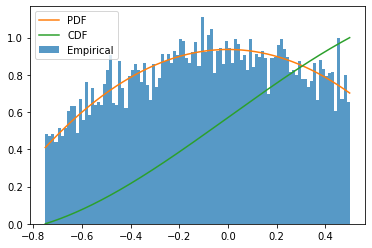

In [647]:
ax = truncbeta_gen().plot(2,2,-0.75,0.5)

Next, define the `LKJCorr` distribution over correlation matrices using the method outlined in [LKJ 2009](http://dx.doi.org/10.1016/j.jmva.2009.04.008).

In [5]:
from scipy.stats._multivariate import multi_rv_frozen
class LKJCorr(multi_rv_frozen):
    # defines a distribution over correlation matrices using the vine method by LKJ
    # Ref: http://dx.doi.org/10.1016/j.jmva.2009.04.008
    def __init__(self, k=2, eta=1, name='LKJ_correlation'):
        multi_rv_frozen.__init__(self)
        self.name = str(name)
        assert (isinstance(k, int) and k>=2)
        assert (eta>0)
        self.k = k
        self.eta = float(eta)
        
    def rvs(self, size=1):
        import numpy as np
        if size>1: return np.array([self.rvs() for i in range(size)])
        pcorr = np.zeros((self.k+1, self.k+1)) # initialize the partial correlation matrix
        corr = np.eye(self.k) # correlation matrix
        beta = self.eta + (self.k-1)/2
        for i in range(1, self.k):
            beta -= 1/2
            for j in range(i+1, self.k+1):
                pc = truncbeta(beta, beta, -1, 1).rvs() # every partial correlation is independent beta-distributed over [-1,1]
                pcorr[i, j] = pc
                for l in range(i-1, 0, -1):
                    pc = pc*np.sqrt((1-pcorr[l, i]**2)*(1-pcorr[l, j]**2)) + pcorr[l, i]*pcorr[l, j]
                corr[i-1, j-1] = pc
                corr[j-1, i-1] = pc
        return corr

We sample for $k=4$, $\eta=1$.

In [121]:
rv_lkjc = LKJCorr(4)

In [122]:
rv_lkjc_samples = rv_lkjc.rvs(8000)

Let's plot the marginal distribution of each off-diagonal element of the correlation matrix.

In [675]:
def fit_beta_dist(data, x=None, nonneg=True):
    from scipy.stats import beta
    if nonneg: floc, fscale = 0, 1
    else: floc, fscale = -1, 2
    params = beta.fit(data, floc=floc, fscale=fscale)
    if x is not None: return beta.pdf(x, *params)
    else: return params
    
def plot_corrmat_samples(samples, eta=None, nonneg=False, corr=None, bins=100, fit_beta=False):
    # plot marginal distribution of correlations
    import matplotlib.pyplot as plt
    k = samples.shape[1]
    fig, ax = plt.subplots(k-1, k-1, dpi=180, figsize=(3*k, 3*k), squeeze=False)
    if eta is not None:
        import numpy as np
        from scipy.stats import gaussian_kde
        beta = eta-1+k/2
        x = np.linspace(nonneg-1, 1, 1000)
        y = truncbeta(beta, beta, nonneg-1, 1).pdf(x)
    for i in range(k-1):
        for j in range(i):
            ax[i, j].set_axis_off()
        for j in range(i+1, k):
            if not(i): ax[i, j-1].set_title('%i'%(j+1))
            if j==i+1: ax[i, j-1].set_ylabel('%i'%(i+1))
            ax[i, j-1].hist(samples[:,i,j], density=True, label='Empirical histogram', alpha=0.75, bins=bins)
            if eta is not None:
                ax[i, j-1].plot(x, gaussian_kde(samples[:,i,j])(x), color='k', ls=':', label='Empirical density')
                ax[i, j-1].plot(x, y, color='k', label='Analytic density')
            if corr is not None:
                ax[i, j-1].axvline(corr[i, j], color='k', ls='--', label='True value')
            if fit_beta:
                import numpy as np
                x_ = np.linspace(nonneg-1, 1, 1000)
                y_ = fit_beta_dist(samples[:,i,j], x_, nonneg)
                ax[i, j-1].plot(x_, y_, color='k', label='Beta-fit density', ls='-.')                
    handles, labels = ax[0,0].get_legend_handles_labels()
    ax[min(k-2, 1), 0].legend(handles, labels)
    return ax

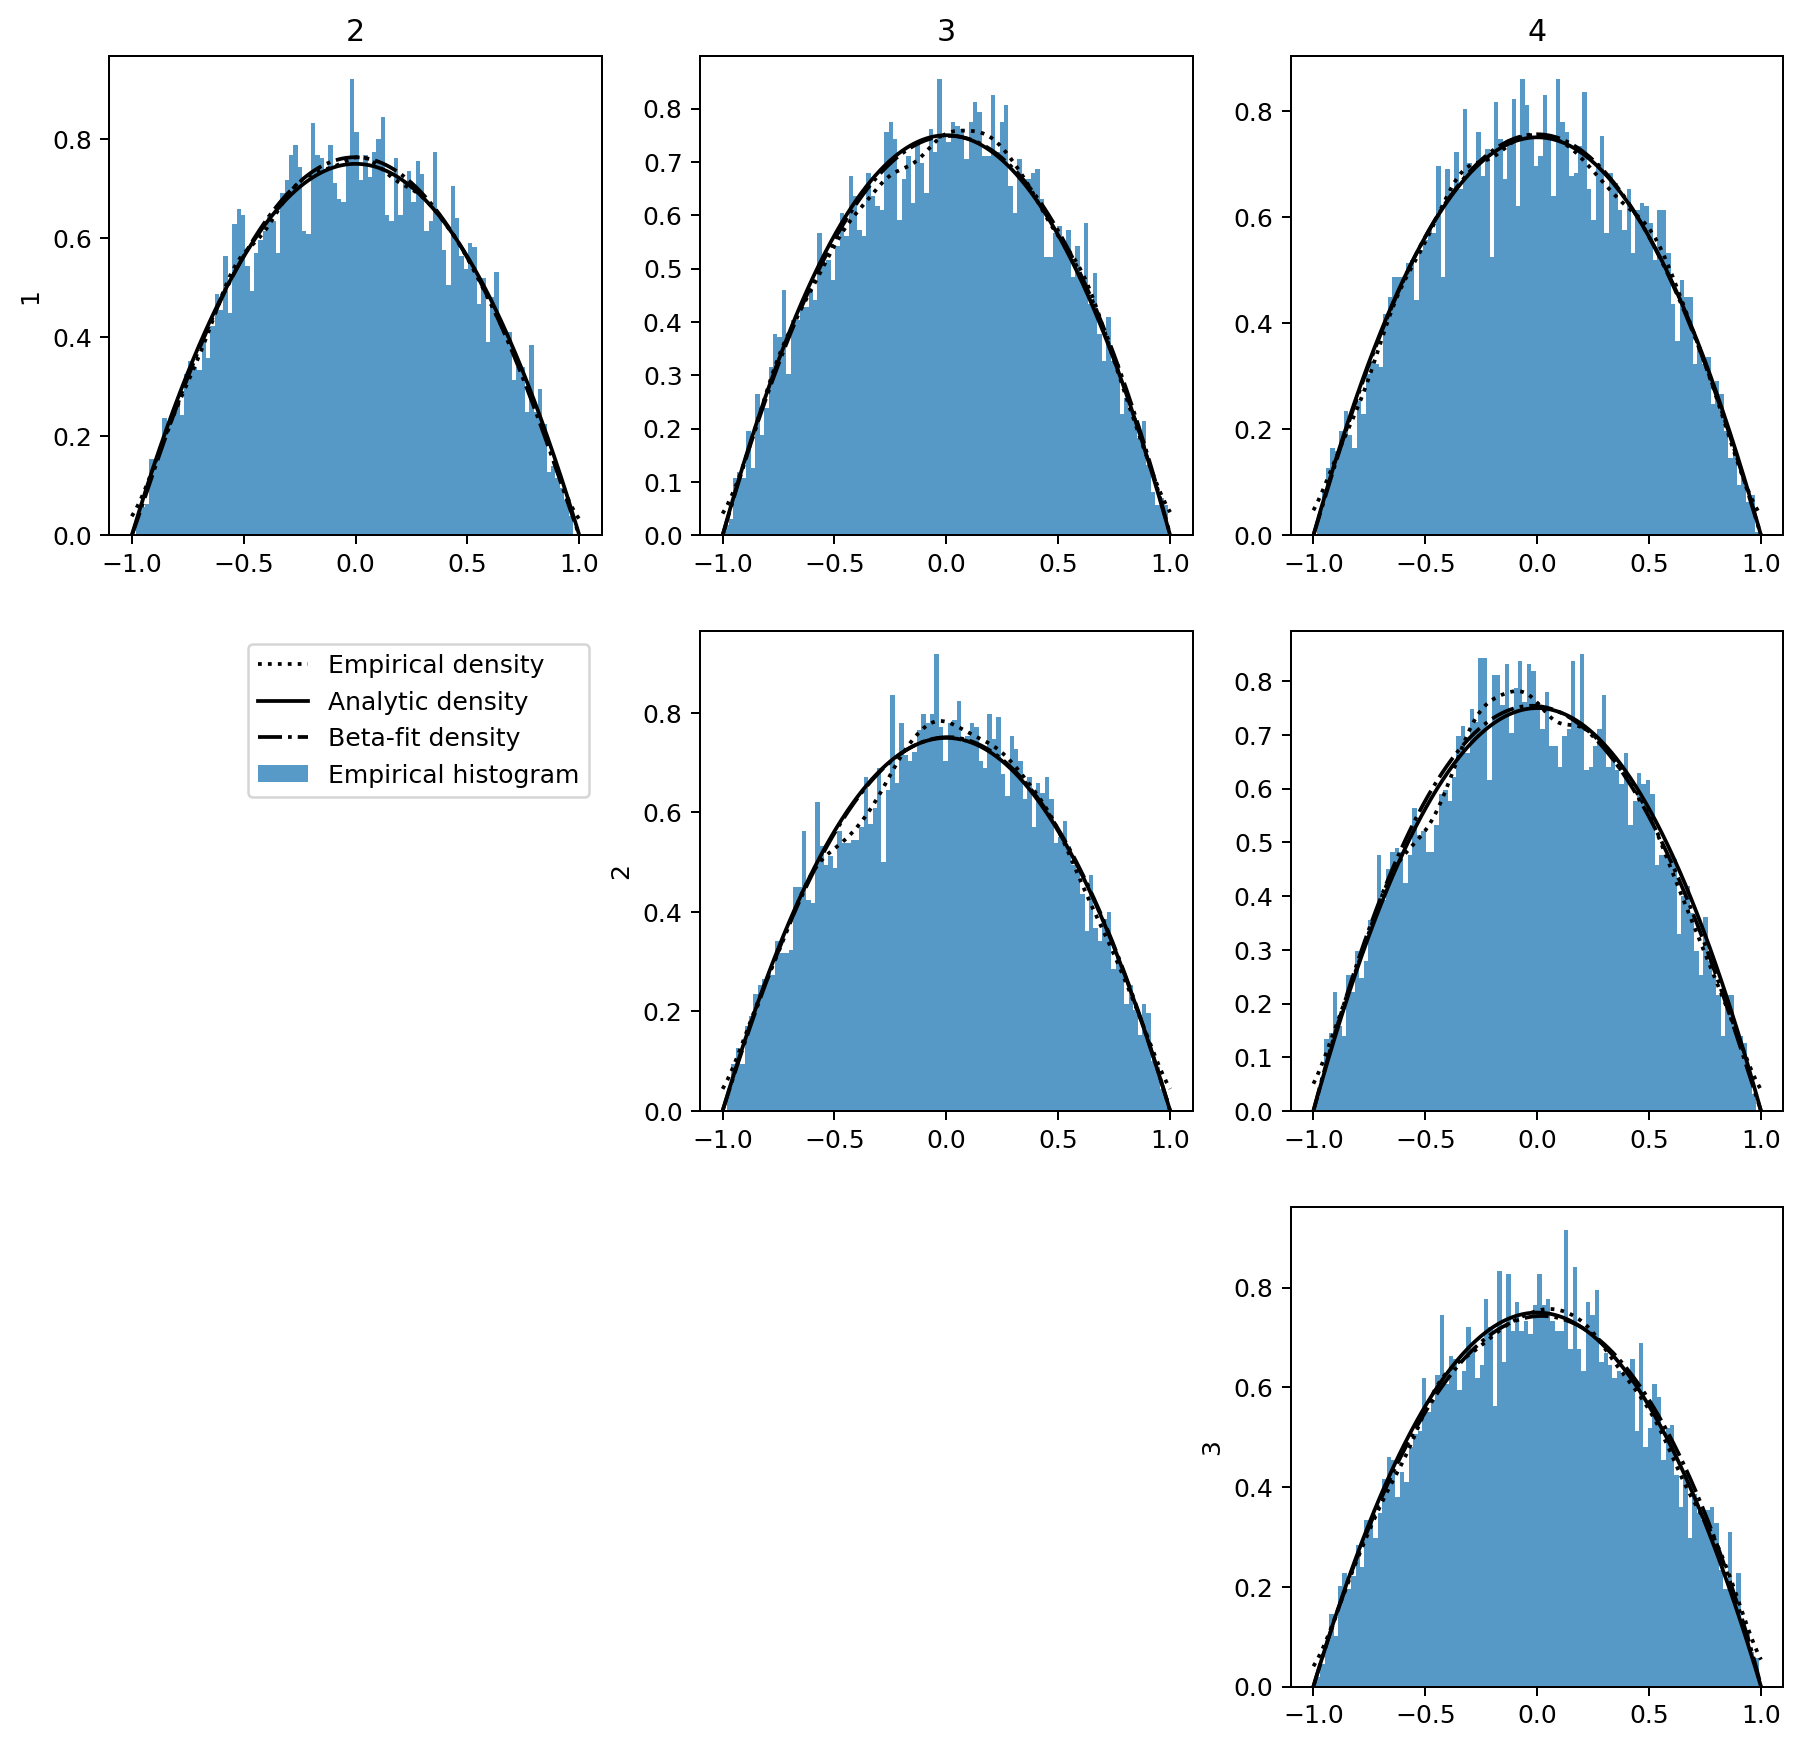

In [676]:
ax = plot_corrmat_samples(rv_lkjc_samples, 1, nonneg=False, fit_beta=True)

***Method 1: impose marginal constraints.*** Evidently, the marginal distribution of every entry is beta, with symmetric parameters $\eta-1+k/2$. One idea for generating (*almost*) correlation matrices then is to impose a truncated beta distribution of parameters $\eta-1+k/2$, where $\eta$ still controls some prior assumption on homophily. We call this the `TruncBetaMat` distribution.

In [6]:
class TruncBetaMat(multi_rv_frozen):
    # defines a distribution over non-negative matrices via marginal Beta distributions that match LKJCorr
    def __init__(self, k=2, eta=1, name='truncated_beta_matrix'):
        multi_rv_frozen.__init__(self)
        self.name = str(name)
        assert (isinstance(k, int) and k>=2)
        assert (eta>0)
        self.k = k
        self.eta = float(eta)
        
    def rvs(self, size=1):
        import numpy as np
        if size>1: return np.array([self.rvs() for i in range(size)])
        X = np.zeros((self.k, self.k))
        beta = self.eta - 1 + self.k/2
        X[np.triu_indices(self.k, k=1)] = truncbeta(beta, beta, 0, 1).rvs(size=self.k*(self.k-1)//2)
        X = X + X.T + np.eye(self.k)
        return X

In [124]:
rv_tbetamat = TruncBetaMat(4)

In [125]:
rv_tbetamat_samples = rv_tbetamat.rvs(8000)

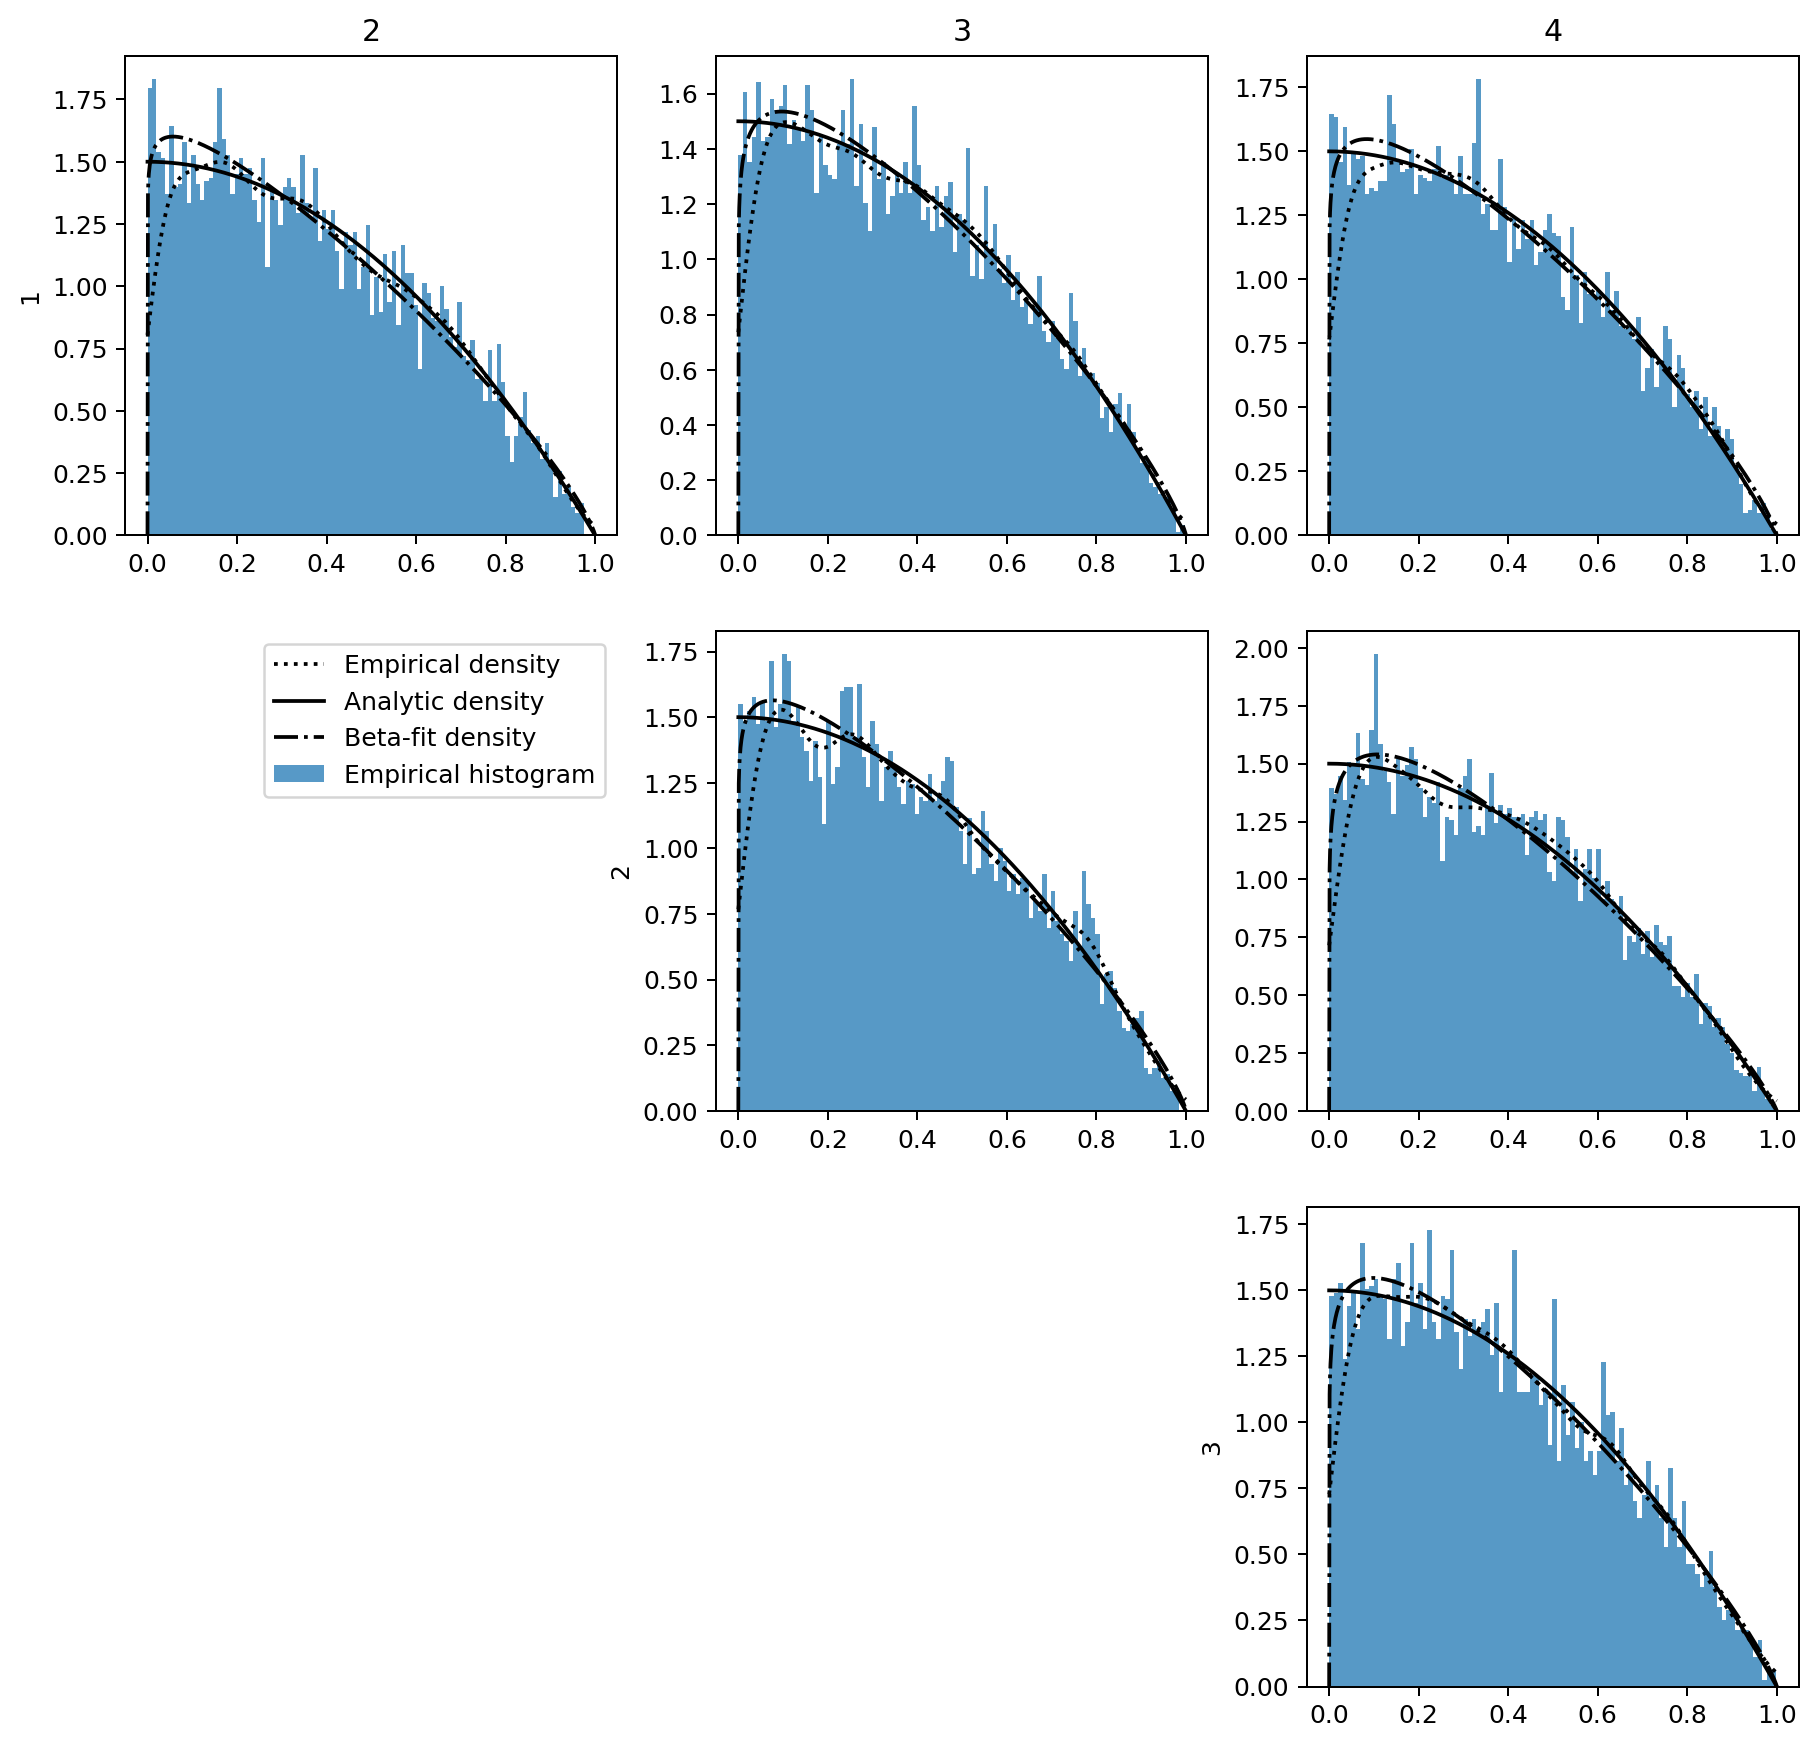

In [666]:
ax = plot_corrmat_samples(rv_tbetamat_samples, 1, nonneg=True, fit_beta=True)

As expected, the marginal distribution of every off-diagonal element is a truncated beta on $[0,1]$. This is also fairly quick to sample from, and can be parametrised such that the HMC sampler will have no troubles in sampling from the posterior. However, it remains to be seen if the generated matrices are "valid" as correlation matrices, i.e. if they are always positive semi-definite. This is because Eq. 1 tells us that ensuring off-diagonal elements ($\Omega_{uv}$) to be smaller than the geometric mean of the diagonal elements ($1$) is a necessary, but perhaps not sufficient condition for homophily.

***Method 2: "rejection sampling" with non-negative correlation constraint.*** We next consider a (rather odd and bad) way to generate samples of non-negative correlation matrices. Say we generate matrices from the LKJ distribution, but reject the matrix if it has a negative entry. We refer to this as the `LKJCorrRejection` distribution. This strategy will generate samples from (some) distribution over non-negative correlation matrices, but will be rather inefficient given that the space of non-negative correlation matrices would become vanishingly small in the space of correlation matrices as dimensionality $k$ increases.

Let's use `stan`'s built-in LKJ random number generator---since it's much faster, and we need the speed!

In [10]:
def stansample_lkjcorrnonneg_rejection(k=4, eta=1, iters=2000):
    # a slow way of generating positive correlation matrices via "rejection sampling"
    # Using `stan`'s built-in LKJCorr distribution for speed
    import pystan as st
    model_code = '''
                    functions {
                        matrix lkj_corr_nonneg_rng(int k, real eta) {
                            matrix[k,k] X;
                            int flag = 1;
                            while (flag) { // loop until positive correlations
                                X = lkj_corr_rng(k, eta);
                                flag = 0;
                                for (i in 1:k) {
                                    for (j in i+1:k) {
                                        if (X[i,j]<0) {
                                            flag = 1;
                                            break;
                                        }
                                    }
                                    if (flag) break;
                                }
                            }
                            return X;
                        }
                    }
                    data {
                        int<lower=0> k; // number of blau categories
                        real<lower=0> eta; // level of homophily
                    }
                    generated quantities {
                        corr_matrix[k] X = lkj_corr_nonneg_rng(k, eta); // non-negative valued correlation matrix
                    }
                '''
    model = st.StanModel(model_code=model_code)
    fit = model.sampling(data=dict(k=k, eta=eta), iter=iters, algorithm='Fixed_param')
    return fit

In [128]:
rv_lkjcnnrej = stansample_lkjcorrnonneg_rejection(4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2fcdd3e1cab91a1c0f23cd7796459594 NOW.


In [2]:
def stanfit2matrix(fit, nrows=1, ncols=None, label='X'):
    # convert stan samples to numpy array of samples
    from src.utils.stanfit import get_stanfit_samples
    import numpy as np
    if ncols is None: ncols = nrows
    names = []
    for i in range(nrows):
        for j in range(ncols):
            names.append('%s[%i,%i]'%(label, i+1, j+1))
    samples = get_stanfit_samples(fit, pars=names)
    samples = np.stack([np.array([samples['%s[%i,%i]'%(label, i+1, j+1)].values for j in range(ncols)]).T for i in range(nrows)], axis=1)
    return samples

In [129]:
rv_lkjcnnrej_samples = stanfit2matrix(rv_lkjcnnrej, 4)

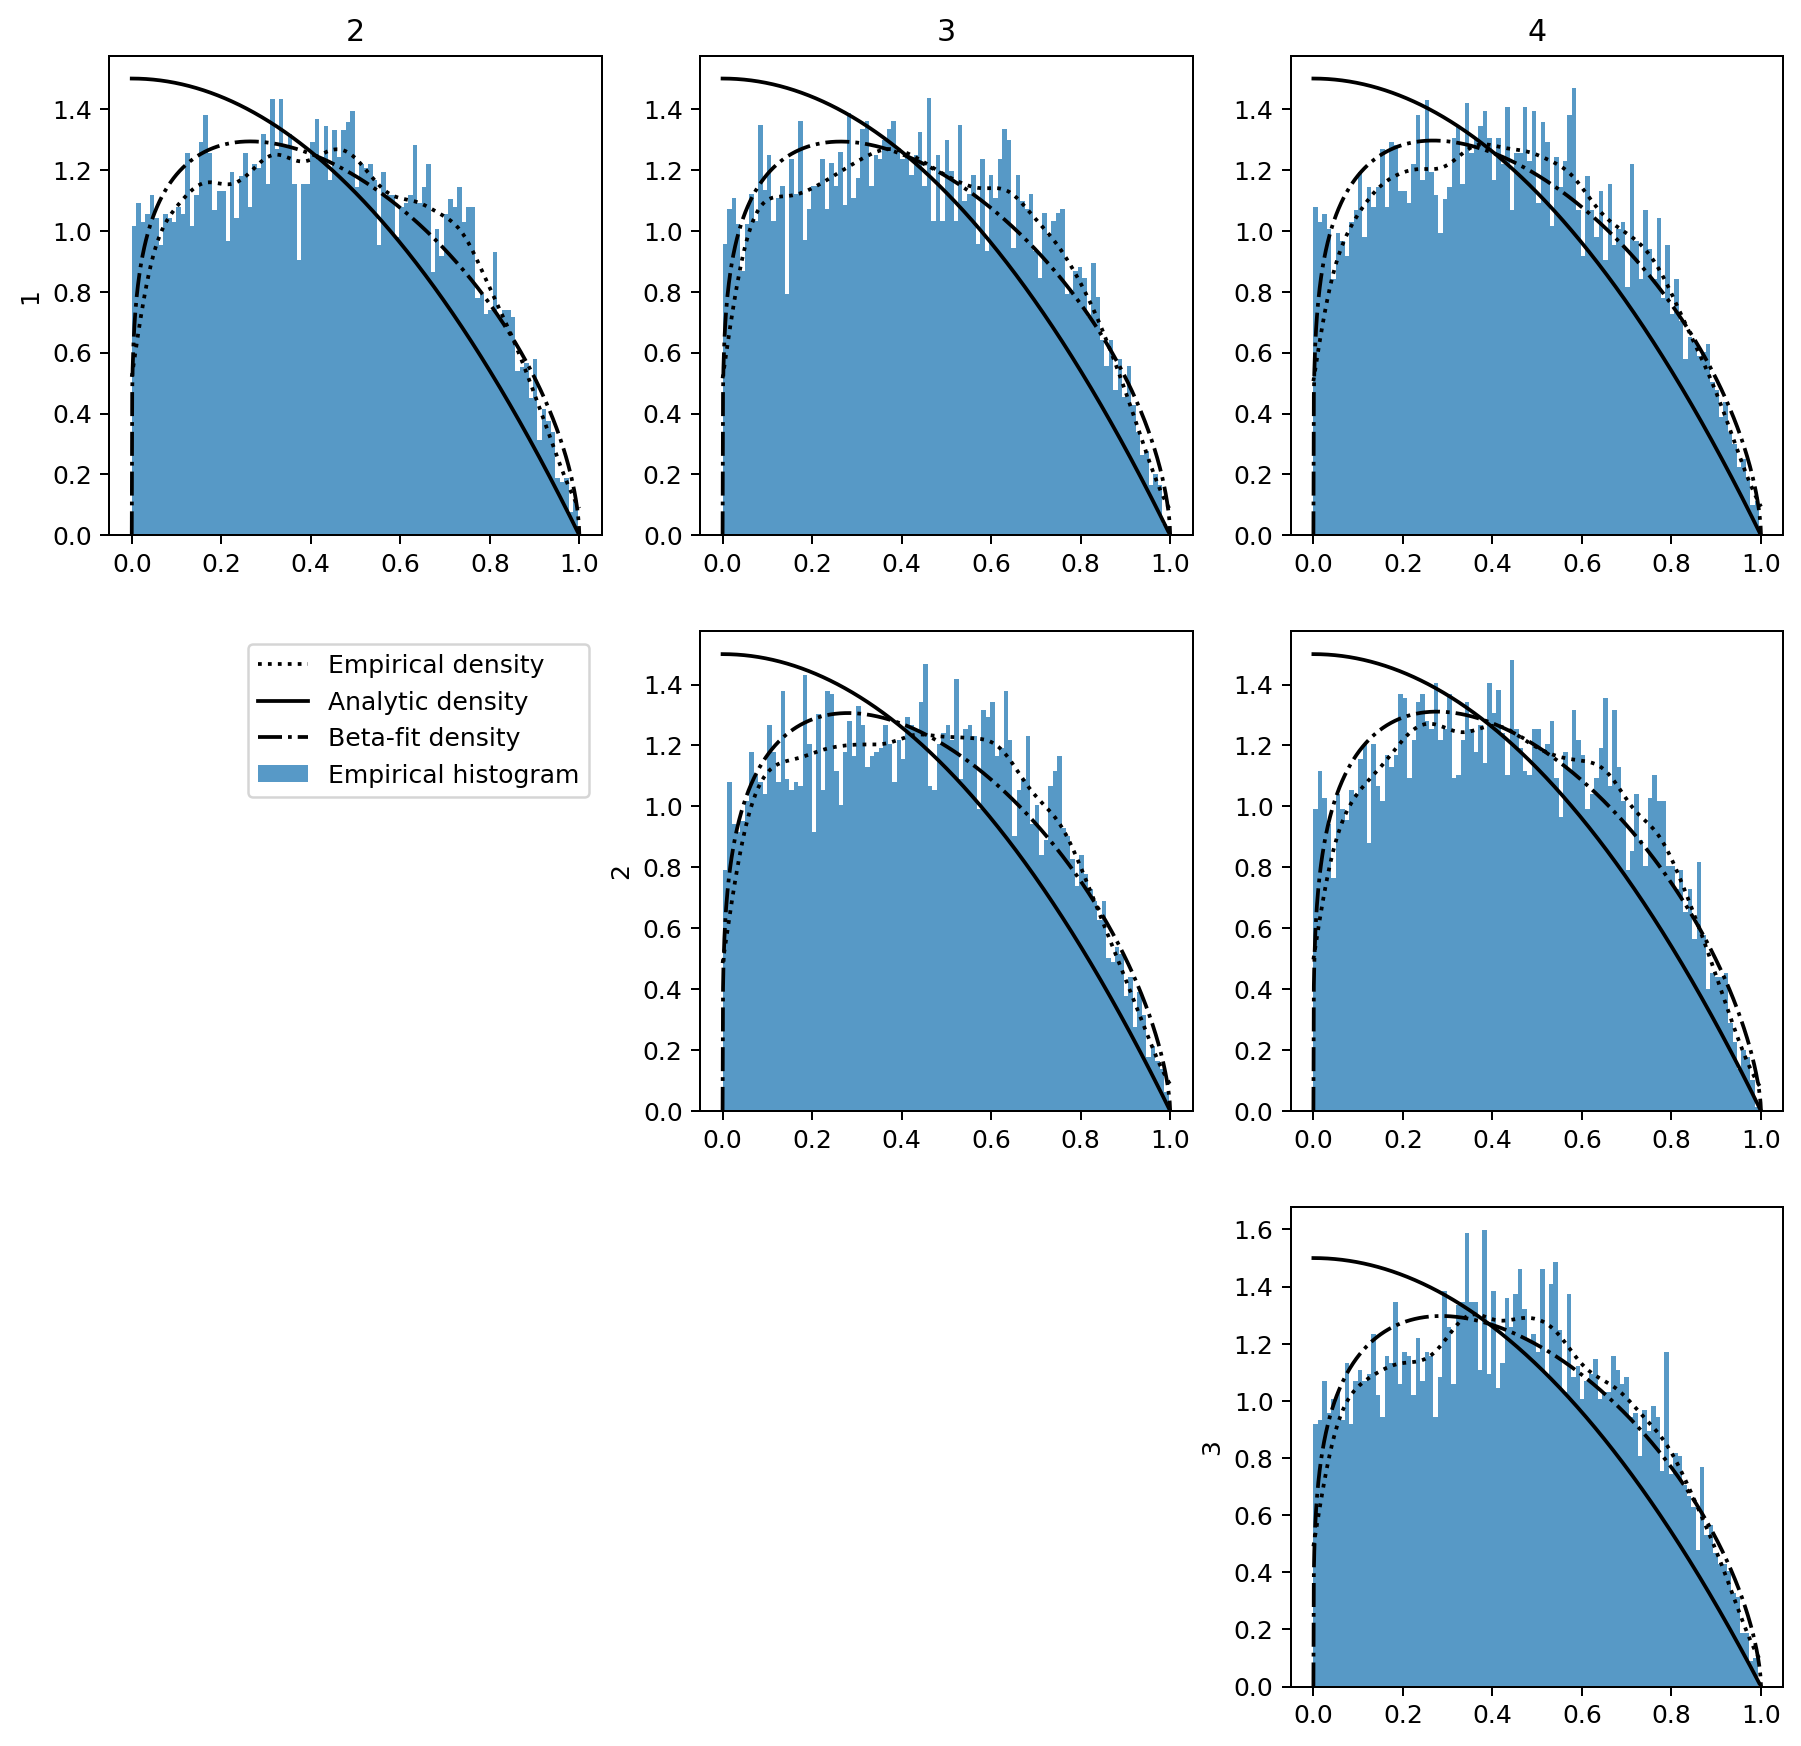

In [667]:
ax = plot_corrmat_samples(rv_lkjcnnrej_samples, 1, nonneg=True, fit_beta=True)

Seems like the marginal distribution here is far from the truncated beta distribution, as some probability mass is displaced from correlations close to 0 to correlations close to 1. Evidently, this method does not sample non-negative correlation matrices "uniformly".

***Method 3: adapt regular vine with non-negative correlation constraint.*** Unsurprisingly, a better strategy to sample non-negative matrices from the LKJ distribution is to generate a kind of "truncated" LKJ distribution, which enforces the constraint of non-negative correlations. That is, the probability mass from correlation matrices with negative entries is removed and distributed equally over non-negative correlation matrices. This can be achieved by adapting the method of LKJ (2009): instead of assuming independent partial correlations on $[-1,1]$, only "valid" partial correlations are sampled over some $[\mathrm{clip},1]$, where $\mathrm{clip}$ depends on previously estimated partial correlations, such that the overall correlations are non-negative. This is done using a truncated Beta distribution over $[\mathrm{clip},1]$. The truncation ensures that as long as the partial correlations are "valid", the distribution will be proportional to $\mathrm{det}(C)^{\eta-1}$. However, due to the conditioning on previous entries of the partial correlation matrix, the distribution is no longer permutation invariant. Therefore, we randomly permutate the correlation matrix in the last step.

Let's define this `LKJCorrNonNeg` distribution.

In [7]:
class LKJCorrNonNeg(LKJCorr):
    # defines a distribution over non-negative correlation matrices via a modified vine method
    def __init__(self, k=2, eta=1, name='LKJ_correlation_nonnegative'):
        LKJCorr.__init__(self, k, eta, name)
        
    def rvs(self, size=1):
        import numpy as np
        if size>1: return np.array([self.rvs() for i in range(size)])
        while True:
            try:
                pcorr = np.zeros((self.k+1, self.k+1)) # initialize the partial correlation matrix
                corr = np.eye(self.k) # correlation matrix
                beta = self.eta + (self.k-1)/2
                for i in range(1, self.k):
                    beta -= 1/2
                    for j in range(i+1, self.k+1):
                        factor = 0.
                        clip = 0.
                        # estimate clipping point of partial correlation to ensure positive correlation
                        for l in range(i-1, 0, -1):
                            factor += 0.5*(np.log2(1-pcorr[l, i]**2)+np.log2(1-pcorr[l, j]**2))
                            clip -= pcorr[l, i]*pcorr[l, j]*np.exp2(-factor)
                        # every partial correlation is beta-distributed over [clip, 1], thus conditioned on previous entries of the pcorr matrix
                        pc = truncbeta(beta, beta, max(-1, clip), 1).rvs() 
                        pcorr[i, j] = pc
                        for l in range(i-1, 0, -1):
                            pc = pc*np.sqrt((1-pcorr[l, i]**2)*(1-pcorr[l, j]**2)) + pcorr[l, i]*pcorr[l, j]
                        corr[i-1, j-1] = pc
                        corr[j-1, i-1] = pc
                # randomly permutate to make it permutation invariant, unlike the original vine method
                order = np.random.permutation(self.k)
                corr = corr[order,:][:,order]
                break
            except ValueError: # (rarely) unable to satisfy positivity --> resample entire correlation matrix
                continue
        return corr

In [131]:
rv_lkjcnn = LKJCorrNonNeg(4)

In [132]:
rv_lkjcnn_samples = rv_lkjcnn.rvs(8000)

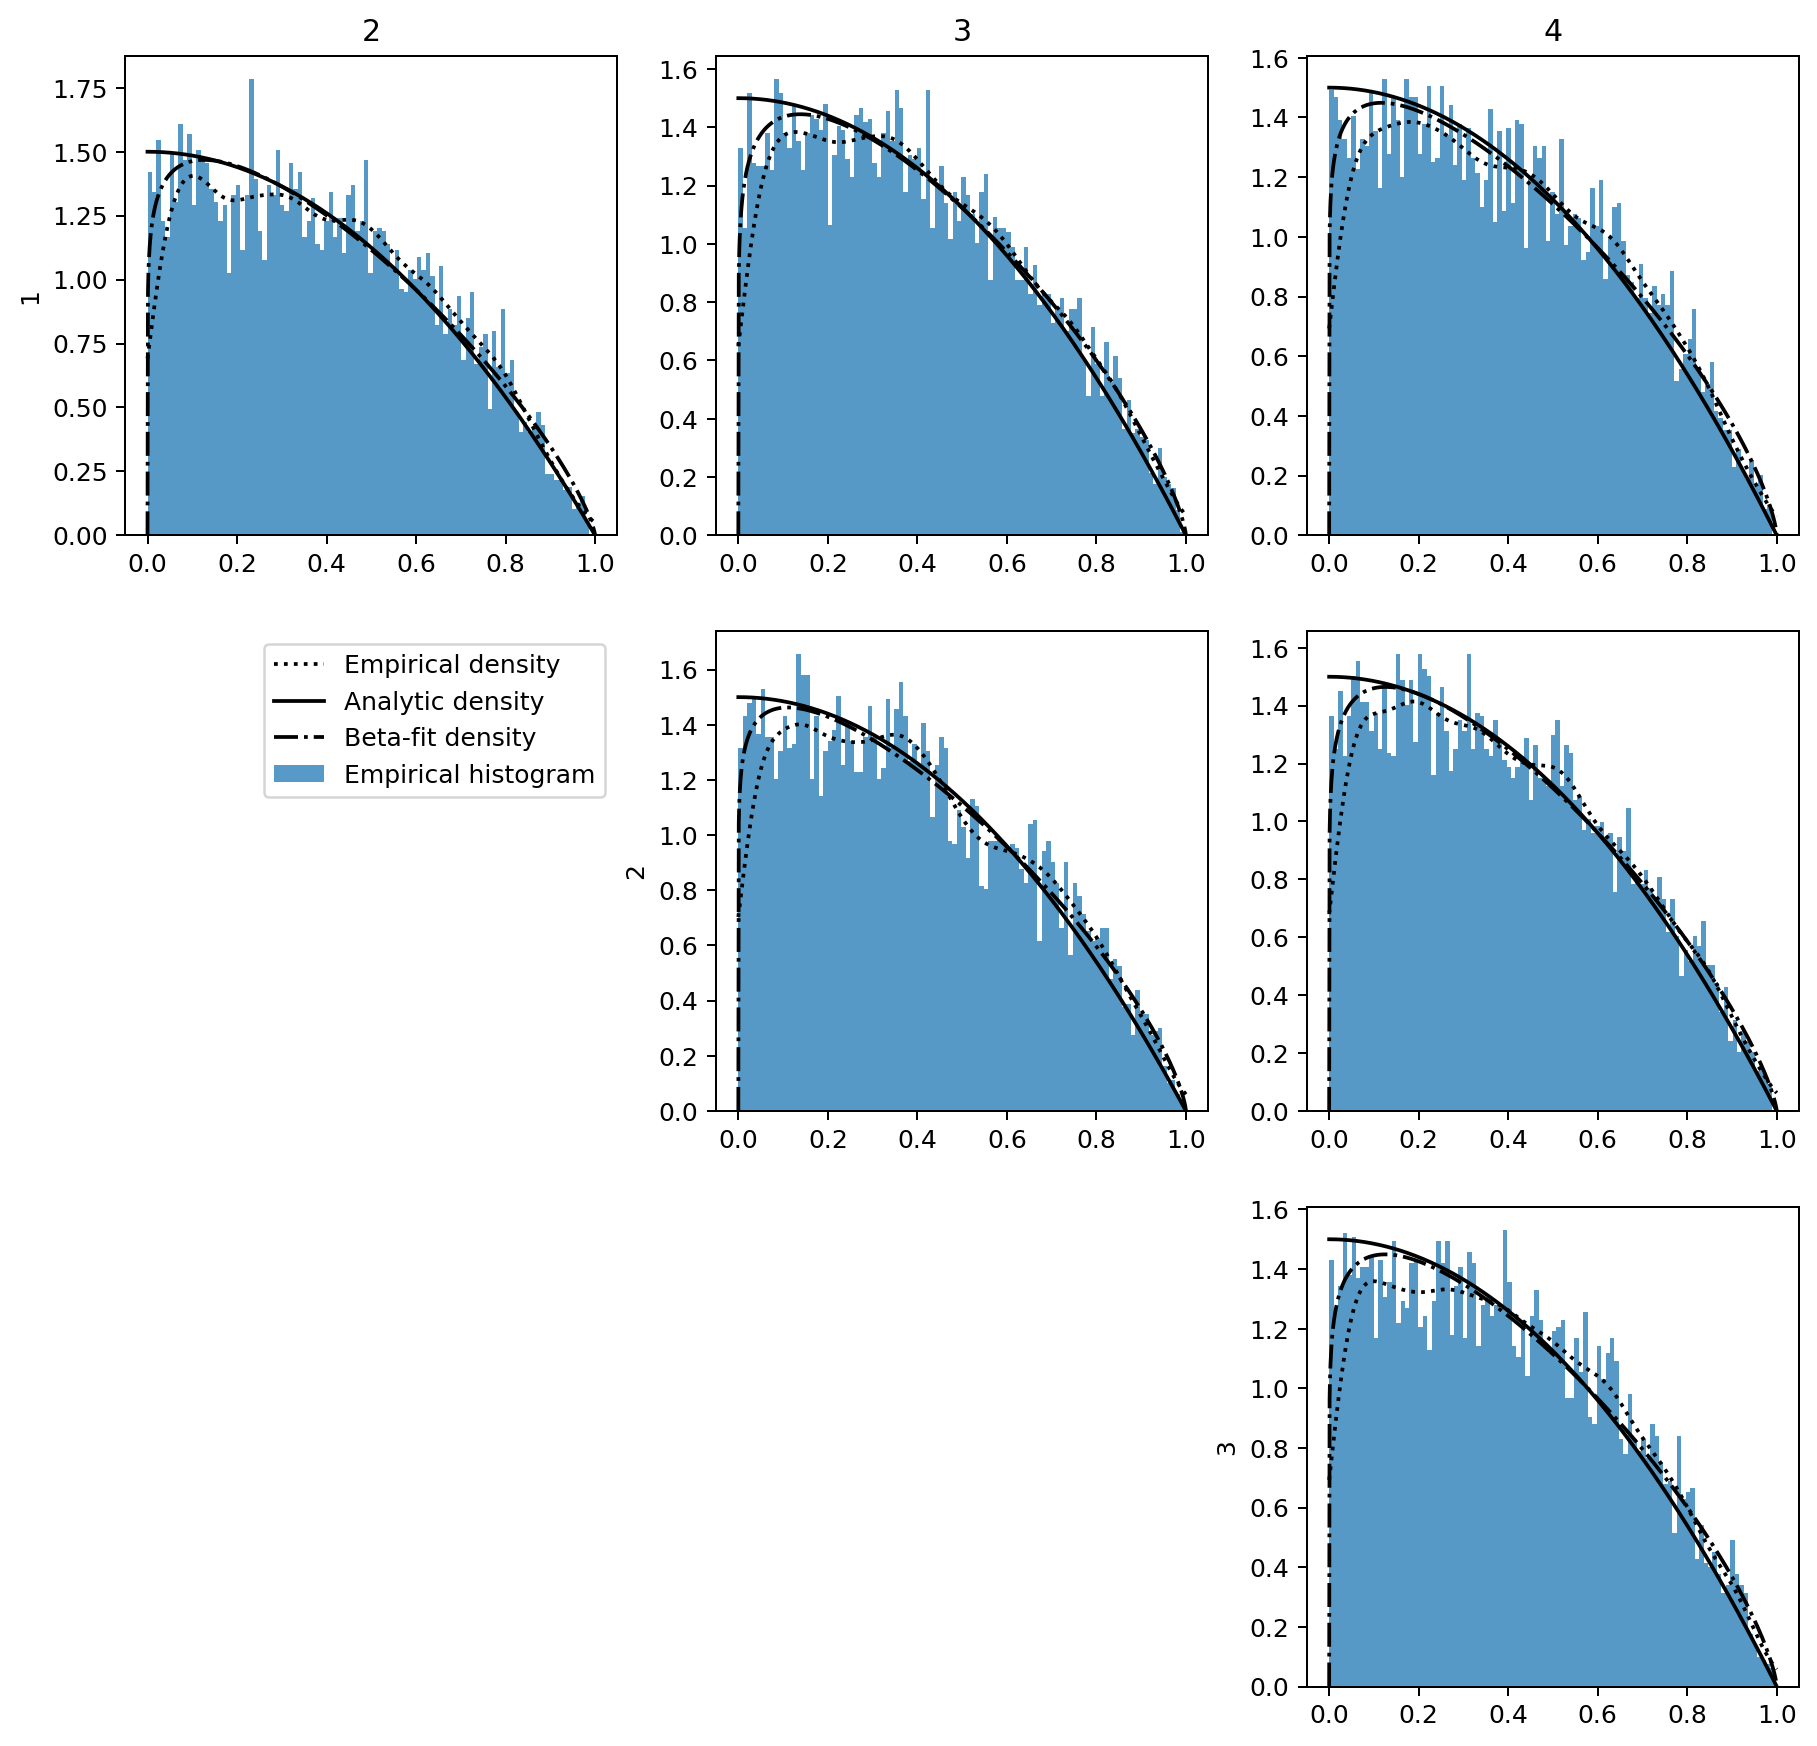

In [668]:
ax = plot_corrmat_samples(rv_lkjcnn_samples, 1, nonneg=True, fit_beta=True)

This time, the marginal distribution looks much closer to the truncated beta (like `TruncBetaMat`), and the positive semi-definiteness is ensured (like `LKJCorr`).

## Comparing all methods

To summarize, we have developed 3 methods of sampling positive "correlation" matrices. We do so by plotting the distribution of

1. All eigenvalues, which indicates the spectrum of the correlation matrices sampled by the above methods.
2. Matrix determinant, whose value being closer to $1$ indicates a more spherical correlation matrix, i.e. higher homophily.
3. Largest eigenvalue, which indicates the mean connectivity.
4. Smallest eigenvalue, which we aim to be supported on the non-negative real line.

In [8]:
def spectral_distribution(samples, eta=None, bins=100, labels='', subtitle=''):
    # plot distributions related to eigenvalues of symmetric matrices
    import numpy as np
    if labels: legend = True
    else: legend = False
    if not isinstance(samples, list): samples = [samples]
    if not isinstance(labels, list): labels = [labels]*len(samples)
    outs = {'eig':[], 'det':[], 'eigmax': [], 'eigmin': []}
    for sample in samples:
        for key in outs: outs[key].append([])
        errs = 0
        for s in sample:
            try:
                eig = np.linalg.eigvalsh(s)
                outs['eig'][-1] += list(eig)
                outs['det'][-1].append(np.prod(eig))
                outs['eigmax'][-1].append(np.max(eig))
                outs['eigmin'][-1].append(np.min(eig))
            except:
                errs += 1
        if errs:
            import warnings
            warnings.warn('Eigenvalues did not converge for %i of %i samples'%(errs, sample.shape[0]), UserWarning)
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(2, 2, dpi=180, figsize=(4*2, 3*2))
    def plot_dist(ax, data, label=''):
        if not bins:
            from scipy.stats import gaussian_kde
            x = np.linspace(min(data), max(data), 1000)
            ax.plot(x, gaussian_kde(data)(x), label=label)
        else:
            ax.hist(data, alpha=0.5, bins=bins, label=label)
    mapping = {(0,0): 'eig', (0,1): 'det', (1,0): 'eigmax', (1,1): 'eigmin'}
    for key in mapping:   
        for i in range(len(samples)):
            plot_dist(ax[key], outs[mapping[key]][i], labels[i])
        ax[key].set_xlabel(mapping[key])
    if legend: ax[(0,0)].legend()
    title = 'Distribution of matrices with $k=%i$'%(samples[0].shape[1])
    if eta is not None:
        if round(eta)==eta: title += ', $\\eta=%i$'%eta
        else: title += ', $\\eta=%.1f$'%eta
    if subtitle: title += str(subtitle)
    #plt.tight_layout()
    plt.suptitle(title)
    return ax

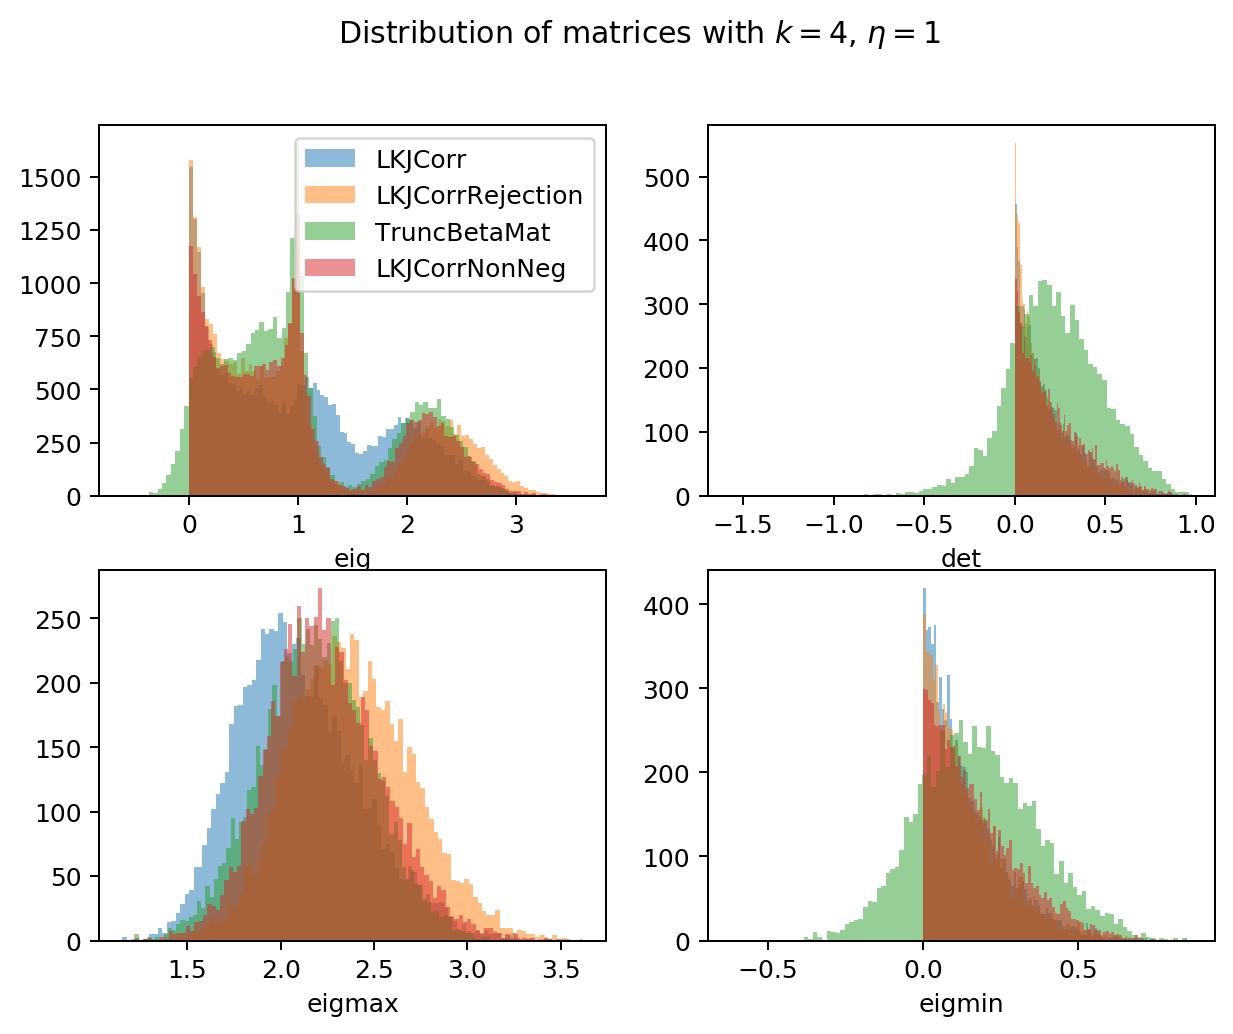

In [134]:
ax = spectral_distribution([rv_lkjc_samples, rv_lkjcnnrej_samples, rv_tbetamat_samples, rv_lkjcnn_samples], eta=1, labels=['LKJCorr', 'LKJCorrRejection', 'TruncBetaMat', 'LKJCorrNonNeg'])

Let's also do a density plot for some clarity and to aid comparison.

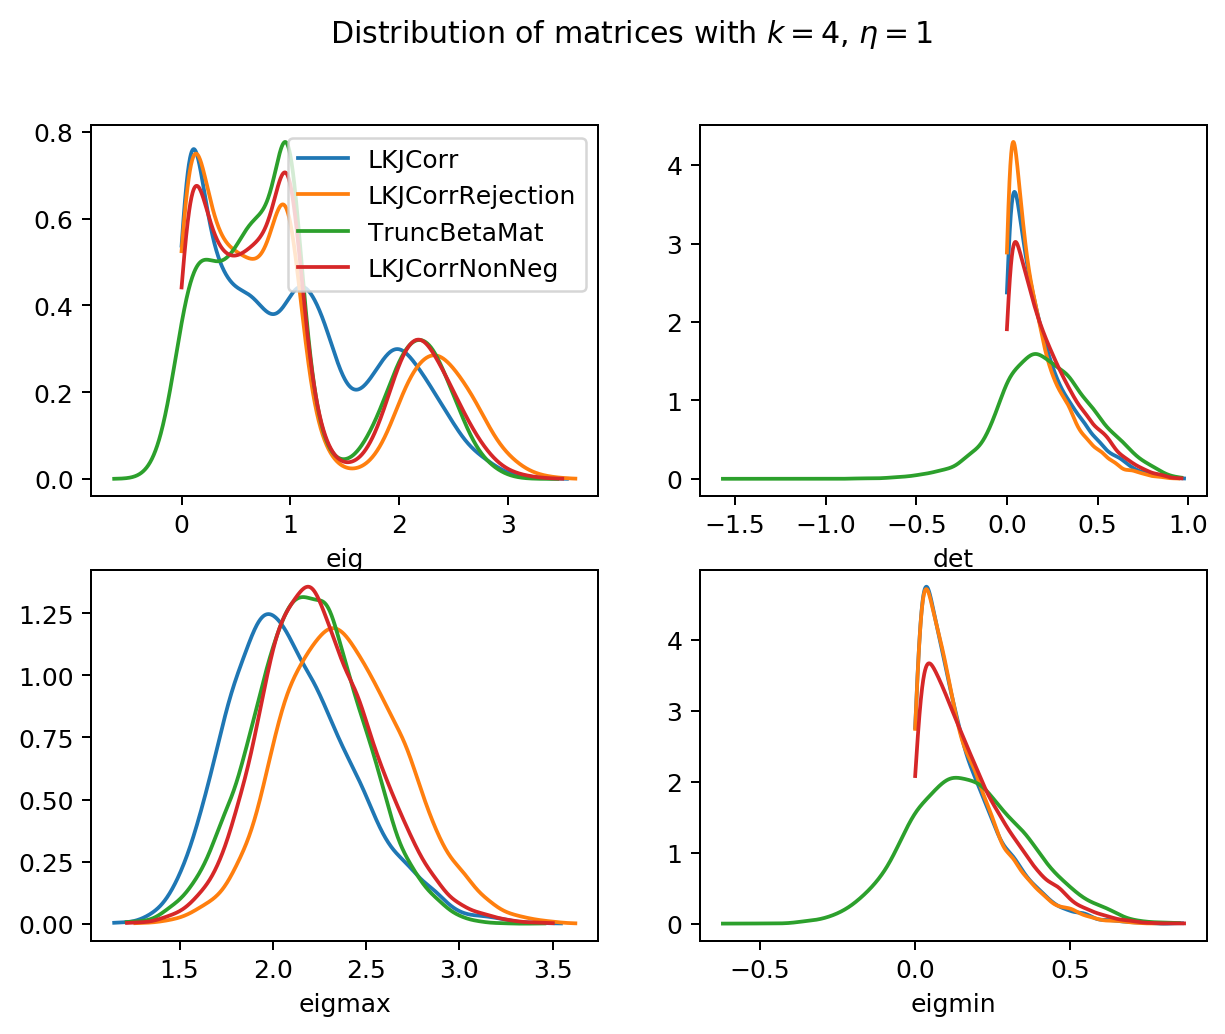

In [135]:
ax = spectral_distribution([rv_lkjc_samples, rv_lkjcnnrej_samples, rv_tbetamat_samples, rv_lkjcnn_samples], eta=1, bins=0, labels=['LKJCorr', 'LKJCorrRejection', 'TruncBetaMat', 'LKJCorrNonNeg'])

The main observations from above are:

1. The `LKJCorr` distribution, over all correlation matrices, differs the most in its spectrum from the other distributions over non-negative correlation matrices. Close to $0$, it is the nearest to `LKJCorrRejection`.
2. The `TruncBetaMat` distribution (with $\eta=1$) is unable to ensure positive semi-definiteness, i.e. some level of heterophily is permitted. Thus, it differs vastly in the distribution of the smallest eigenvalue. However, for the rest of the support, and for the largest eigenvalue, it samples closely to the `LKJCorrNonNeg` distribution.

Next, let's see what happens when the dimensionality $k$ and homophily $\eta$ are changed.

In [136]:
def matrix_distribution_samples(k=4, eta=1, num_samples=8000):
    # helper function to sample 4 kinds of "correlation" matrices
    lkjc = LKJCorr(k=k, eta=eta).rvs(num_samples)
    if k<=5: lkjcnnrej = stanfit2matrix(stansample_lkjcorrnonneg_rejection(k=k, eta=eta, iters=num_samples//4), k)
    tbetamat = TruncBetaMat(k=k, eta=eta).rvs(num_samples)
    lkjcnn = LKJCorrNonNeg(k=k, eta=eta).rvs(num_samples)
    if k<=5:
        out = {'samples': [lkjc, lkjcnnrej, tbetamat, lkjcnn], 'eta':eta,
               'labels': ['LKJCorr', 'LKJCorrRejection', 'TruncBetaMat', 'LKJCorrNonNeg']}
    else: # for larger dimensions the rejection sampling gets too slow!
        out = {'samples': [lkjc, tbetamat, lkjcnn], 'eta':eta,
               'labels': ['LKJCorr', 'TruncBetaMat', 'LKJCorrNonNeg']}
    return out

First, we keep $\eta=1$, but increase dimensionality to $k=8$. (We ignore `LKJCorrRejection` for larger kernels.)

In [137]:
matrix_samples_k8 = matrix_distribution_samples(k=8, eta=1)

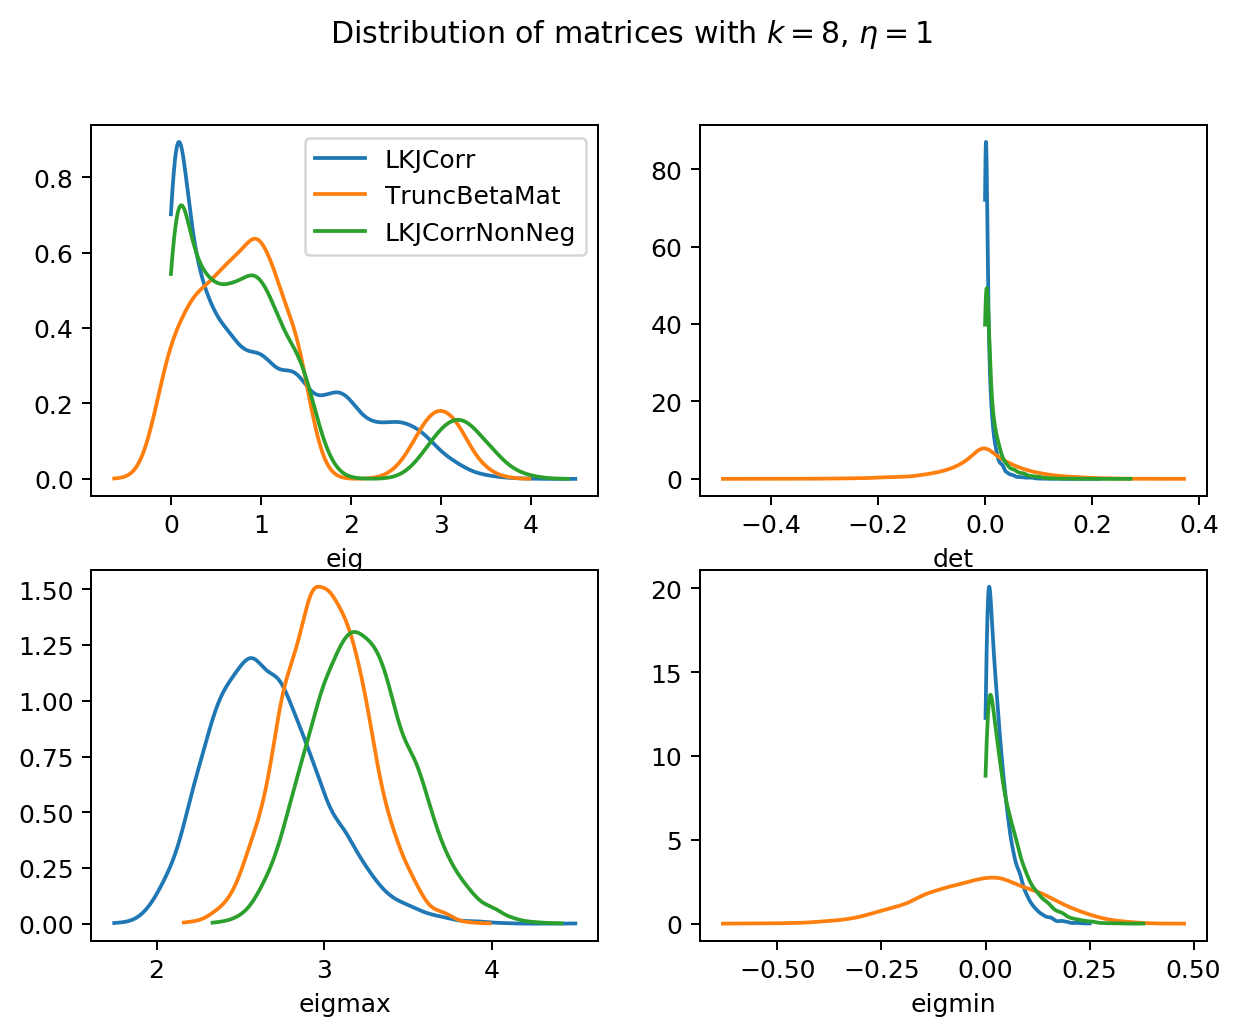

In [138]:
ax = spectral_distribution(samples=matrix_samples_k8['samples'],
                           labels=matrix_samples_k8['labels'],
                           eta=matrix_samples_k8['eta'],
                           bins=0)

Next, we keep $k=4$, but increase homophily to $\eta=4$.

In [139]:
matrix_samples_eta4 = matrix_distribution_samples(k=4, eta=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2fcdd3e1cab91a1c0f23cd7796459594 NOW.


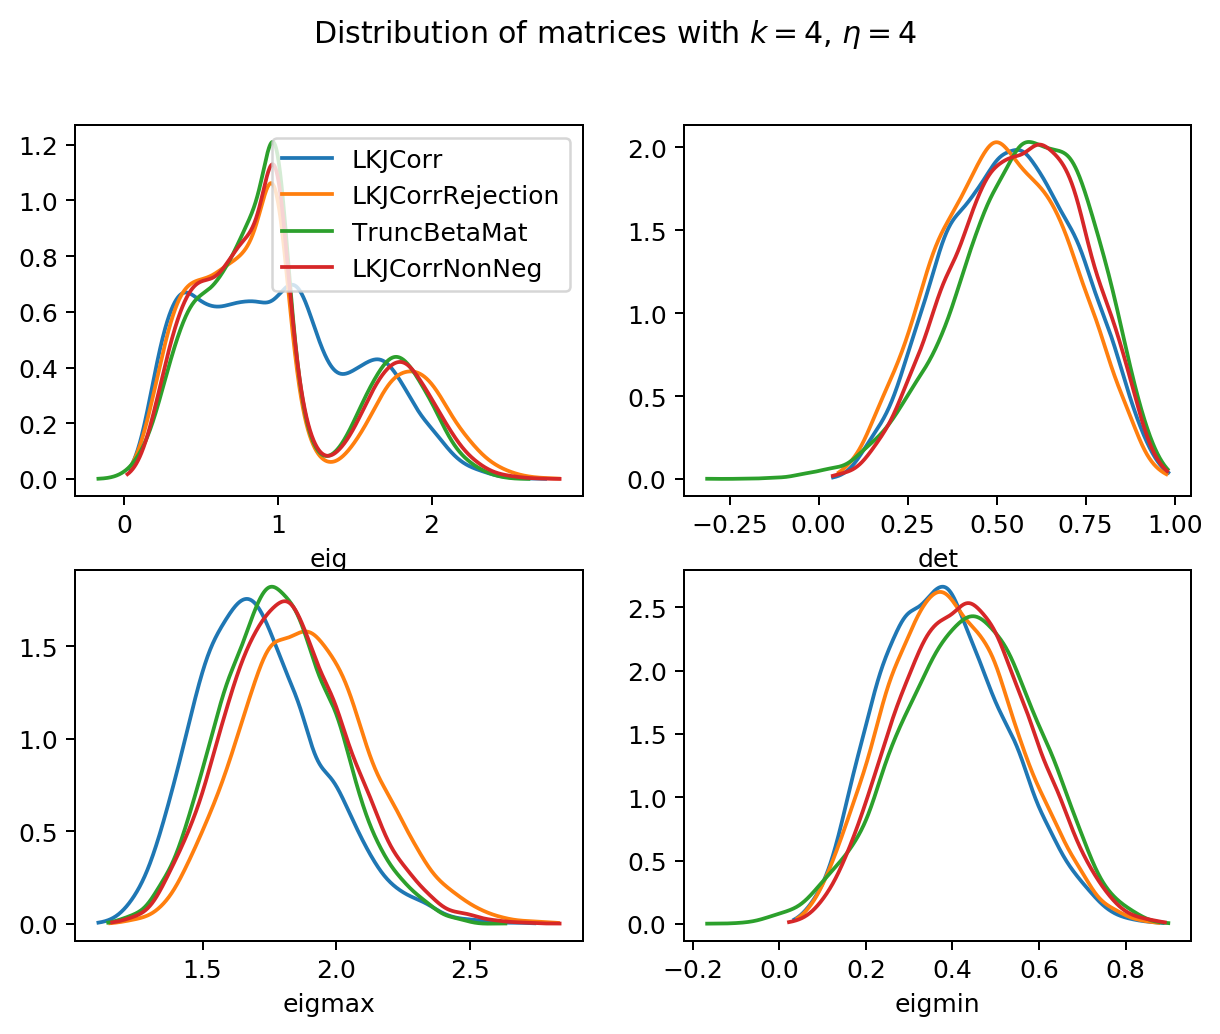

In [140]:
ax = spectral_distribution(samples=matrix_samples_eta4['samples'],
                           labels=matrix_samples_eta4['labels'],
                           eta=matrix_samples_eta4['eta'],
                           bins=0)

Thus, imposing stronger homophily diminishes the chance of heterophily under `TruncBetaMat`, and all 3 methods concord closely with each other. Finally, we keep $k=4$, and decrease homophily to $\eta=0.25$, which will likely exaggerate the issues with using `TruncBetaMat`.

In [141]:
matrix_samples_etaby4 = matrix_distribution_samples(k=4, eta=0.25)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2fcdd3e1cab91a1c0f23cd7796459594 NOW.


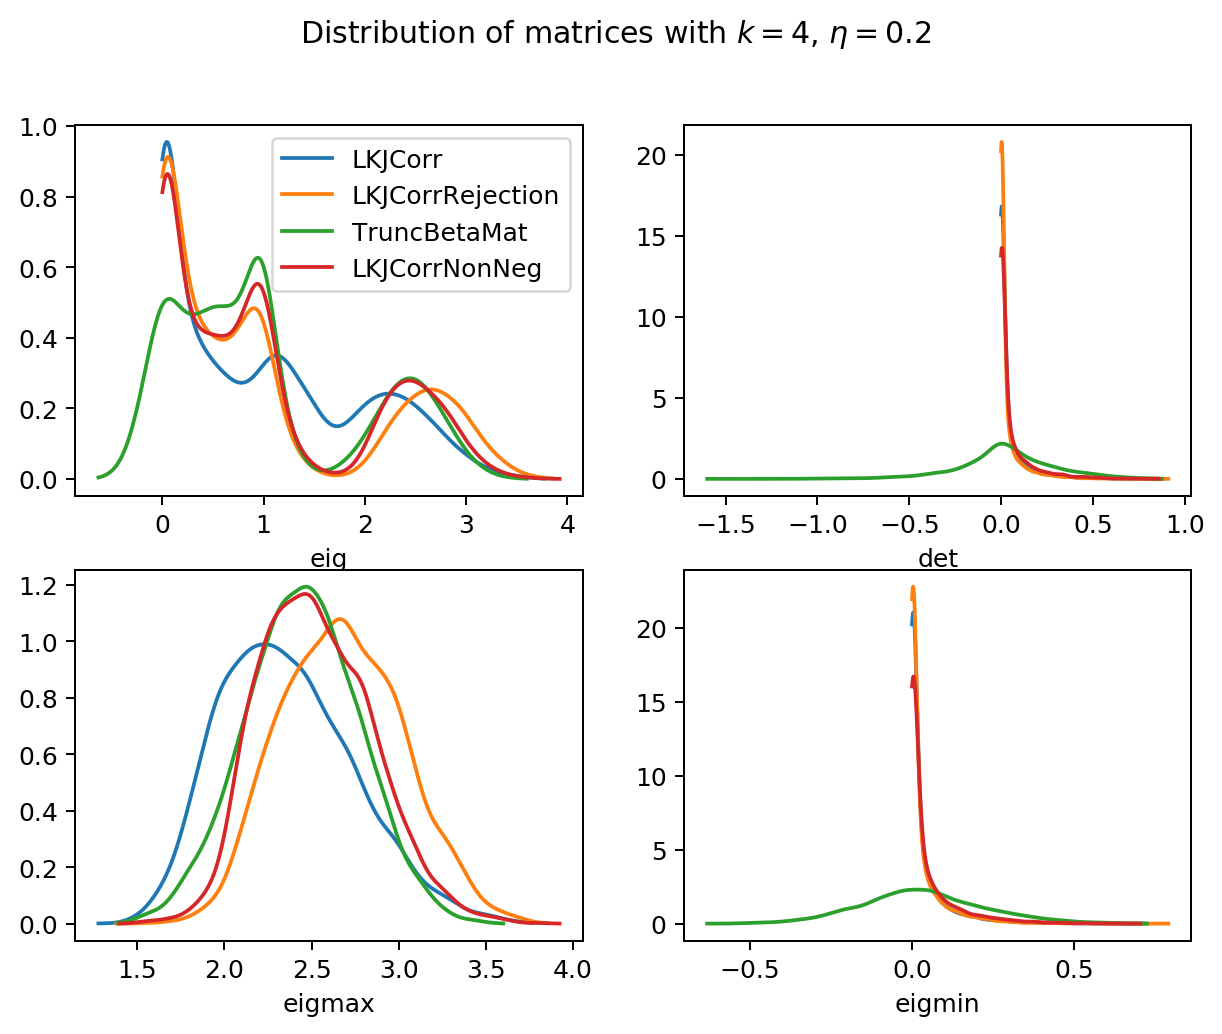

In [142]:
ax = spectral_distribution(samples=matrix_samples_etaby4['samples'],
                           labels=matrix_samples_etaby4['labels'],
                           eta=matrix_samples_etaby4['eta'],
                           bins=0)

## Inference via Hamiltonian Monte Carlo (HMC) in `stan`

Having established two prior distributions for $\Omega$, `LKJCorrNonNeg` and `TruncBetaMat`, we can compare them with regards to inference in `stan`. Implementation of `TruncBetaMat` is fairly straightforward, as it can be parametrized by shifting, scaling, and taking the absolute value of a usual beta distributed random variable over $[0, 1]$. Defining `LKJCorrNonNeg` is trickier, since "truncation" here amounts to imposing a log density of $-\infty$ when there is at least one negative entry in $\Omega$. Since `stan` uses HMC, and the density will have an abruptly changing boundary, this can lead to problematic posterior sampling.

Let's generate samples of the covariance matrix for $k=4$, $\eta=1$ under both of these implementations.

In [100]:
def infer_mvn_cov(data=None, k=4, eta=1, truncbeta=False, iters=2000):
    # stan implementation of an MVN with non-negative correlations
    import pystan as st
    prior_code_lkj = '''
                        data {
                            int<lower=2> k; // number of dimensions
                            real<lower=0> eta; // prior for LKJCorr
                        }
                        parameters {
                            cholesky_factor_corr[k] L; // Cholesky factor for correlation matrix
                        }
                        transformed parameters {
                            // matrix<lower=0>[k, k] Omega=L*L'; // enforcing non-negative correlation matrix
                            matrix[k, k] Omega=L*L'; // correlation matrix
                            real minOmega = min(Omega);
                        }
                        model {
                            L ~ lkj_corr_cholesky(eta);
                            if (minOmega<0) target += negative_infinity(); // enforce non-negativity
                        }
                    '''
    
    posterior_code_lkj = '''
                            data {
                                int<lower=2> k; // number of dimensions
                                real<lower=0> eta; // prior for LKJCorr
                                int<lower=0> n; // number of samples
                                vector[k] x[n]; // data
                            }
                            parameters {
                                cholesky_factor_corr[k] L; // Cholesky factor for correlation matrix
                                vector[k] mu; // mean vector
                            }
                            transformed parameters {
                                // matrix<lower=0>[k, k] Omega=L*L'; // enforcing non-negative correlation matrix
                                matrix[k, k] Omega=L*L'; // correlation matrix
                                real minOmega = min(Omega);
                            }
                            model {
                                L ~ lkj_corr_cholesky(eta);
                                if (minOmega<0) target += negative_infinity(); // enforce non-negativity
                                mu ~ normal(0, 1); // prior for mean
                                x ~ multi_normal_cholesky(mu, L); // data is MVN
                            }
                        '''
    prior_code_tbeta = '''
                        data {
                            int<lower=2> k; // number of dimensions
                            real<lower=0> eta; // prior for truncated Beta
                        }
                        transformed data {
                            real<lower=0> beta_p = eta-1+k/2.0; // parameter for truncated-beta
                        }
                        parameters {
                            vector<lower=0, upper=1>[(k*(k-1))/2] theta; // gets transformed into correlation matrix
                        }
                        transformed parameters {
                            matrix<lower=0, upper=1>[k, k] Omega; // "correlation" matrix via truncated-beta
                            for (i in 1:k) {
                                Omega[i,i] = 1;
                                for (j in i+1:k) {
                                    Omega[i,j] = fabs(2*theta[((2*k-i)*(i-1))/2+j-i]-1); // shift, scale and take absolute value
                                    Omega[j,i] = Omega[i,j];
                                }
                            }
                        }
                        model {
                            theta ~ beta(beta_p, beta_p); // truncated-beta prior
                        }
                    '''
    posterior_code_tbeta = '''
                                data {
                                    int<lower=2> k; // number of dimensions
                                    real<lower=0> eta; // prior for truncated Beta
                                    int<lower=0> n; // number of samples
                                    vector[k] x[n]; // data
                                }
                                transformed data {
                                    real<lower=0> beta_p = eta-1+k/2.0; // parameter for truncated-beta
                                }
                                parameters {
                                    vector<lower=0, upper=1>[(k*(k-1))/2] theta; // gets transformed into correlation matrix
                                    vector[k] mu; // mean vector
                                }
                                transformed parameters {
                                    matrix<lower=0, upper=1>[k, k] Omega; // "correlation" matrix via truncated-beta
                                    for (i in 1:k) {
                                        Omega[i,i] = 1;
                                        for (j in i+1:k) {
                                            Omega[i,j] = fabs(2*theta[((2*k-i)*(i-1))/2+j-i]-1); // shift, scale and take absolute value
                                            Omega[j,i] = Omega[i,j];
                                        }
                                    }
                                }
                                model {
                                    theta ~ beta(beta_p, beta_p); // beta prior
                                    mu ~ normal(0, 1); // prior for mean
                                    x ~ multi_normal(mu, Omega); // data is MVN
                                }
                            '''
    if data is not None:
        if truncbeta: model = st.StanModel(model_code=posterior_code_tbeta)
        else: model = st.StanModel(model_code=posterior_code_lkj)
        fit = model.sampling(data=dict(x=data['x'], n=data['x'].shape[0], k=data['x'].shape[1], eta=eta), iter=iters)
    else:
        if truncbeta: model = st.StanModel(model_code=prior_code_tbeta)
        else: model = st.StanModel(model_code=prior_code_lkj)
        fit = model.sampling(data=dict(k=k, eta=eta), iter=iters)
    return fit

First, for the `LKJCorrNonNeg` distribution.

In [143]:
lkjcorrnonneg_stanfit = infer_mvn_cov()

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ede73c841bd2312aaca629f1777adb8c NOW.


In [144]:
lkjcorrnonneg_stanfit_samples = stanfit2matrix(lkjcorrnonneg_stanfit, 4, label='Omega')

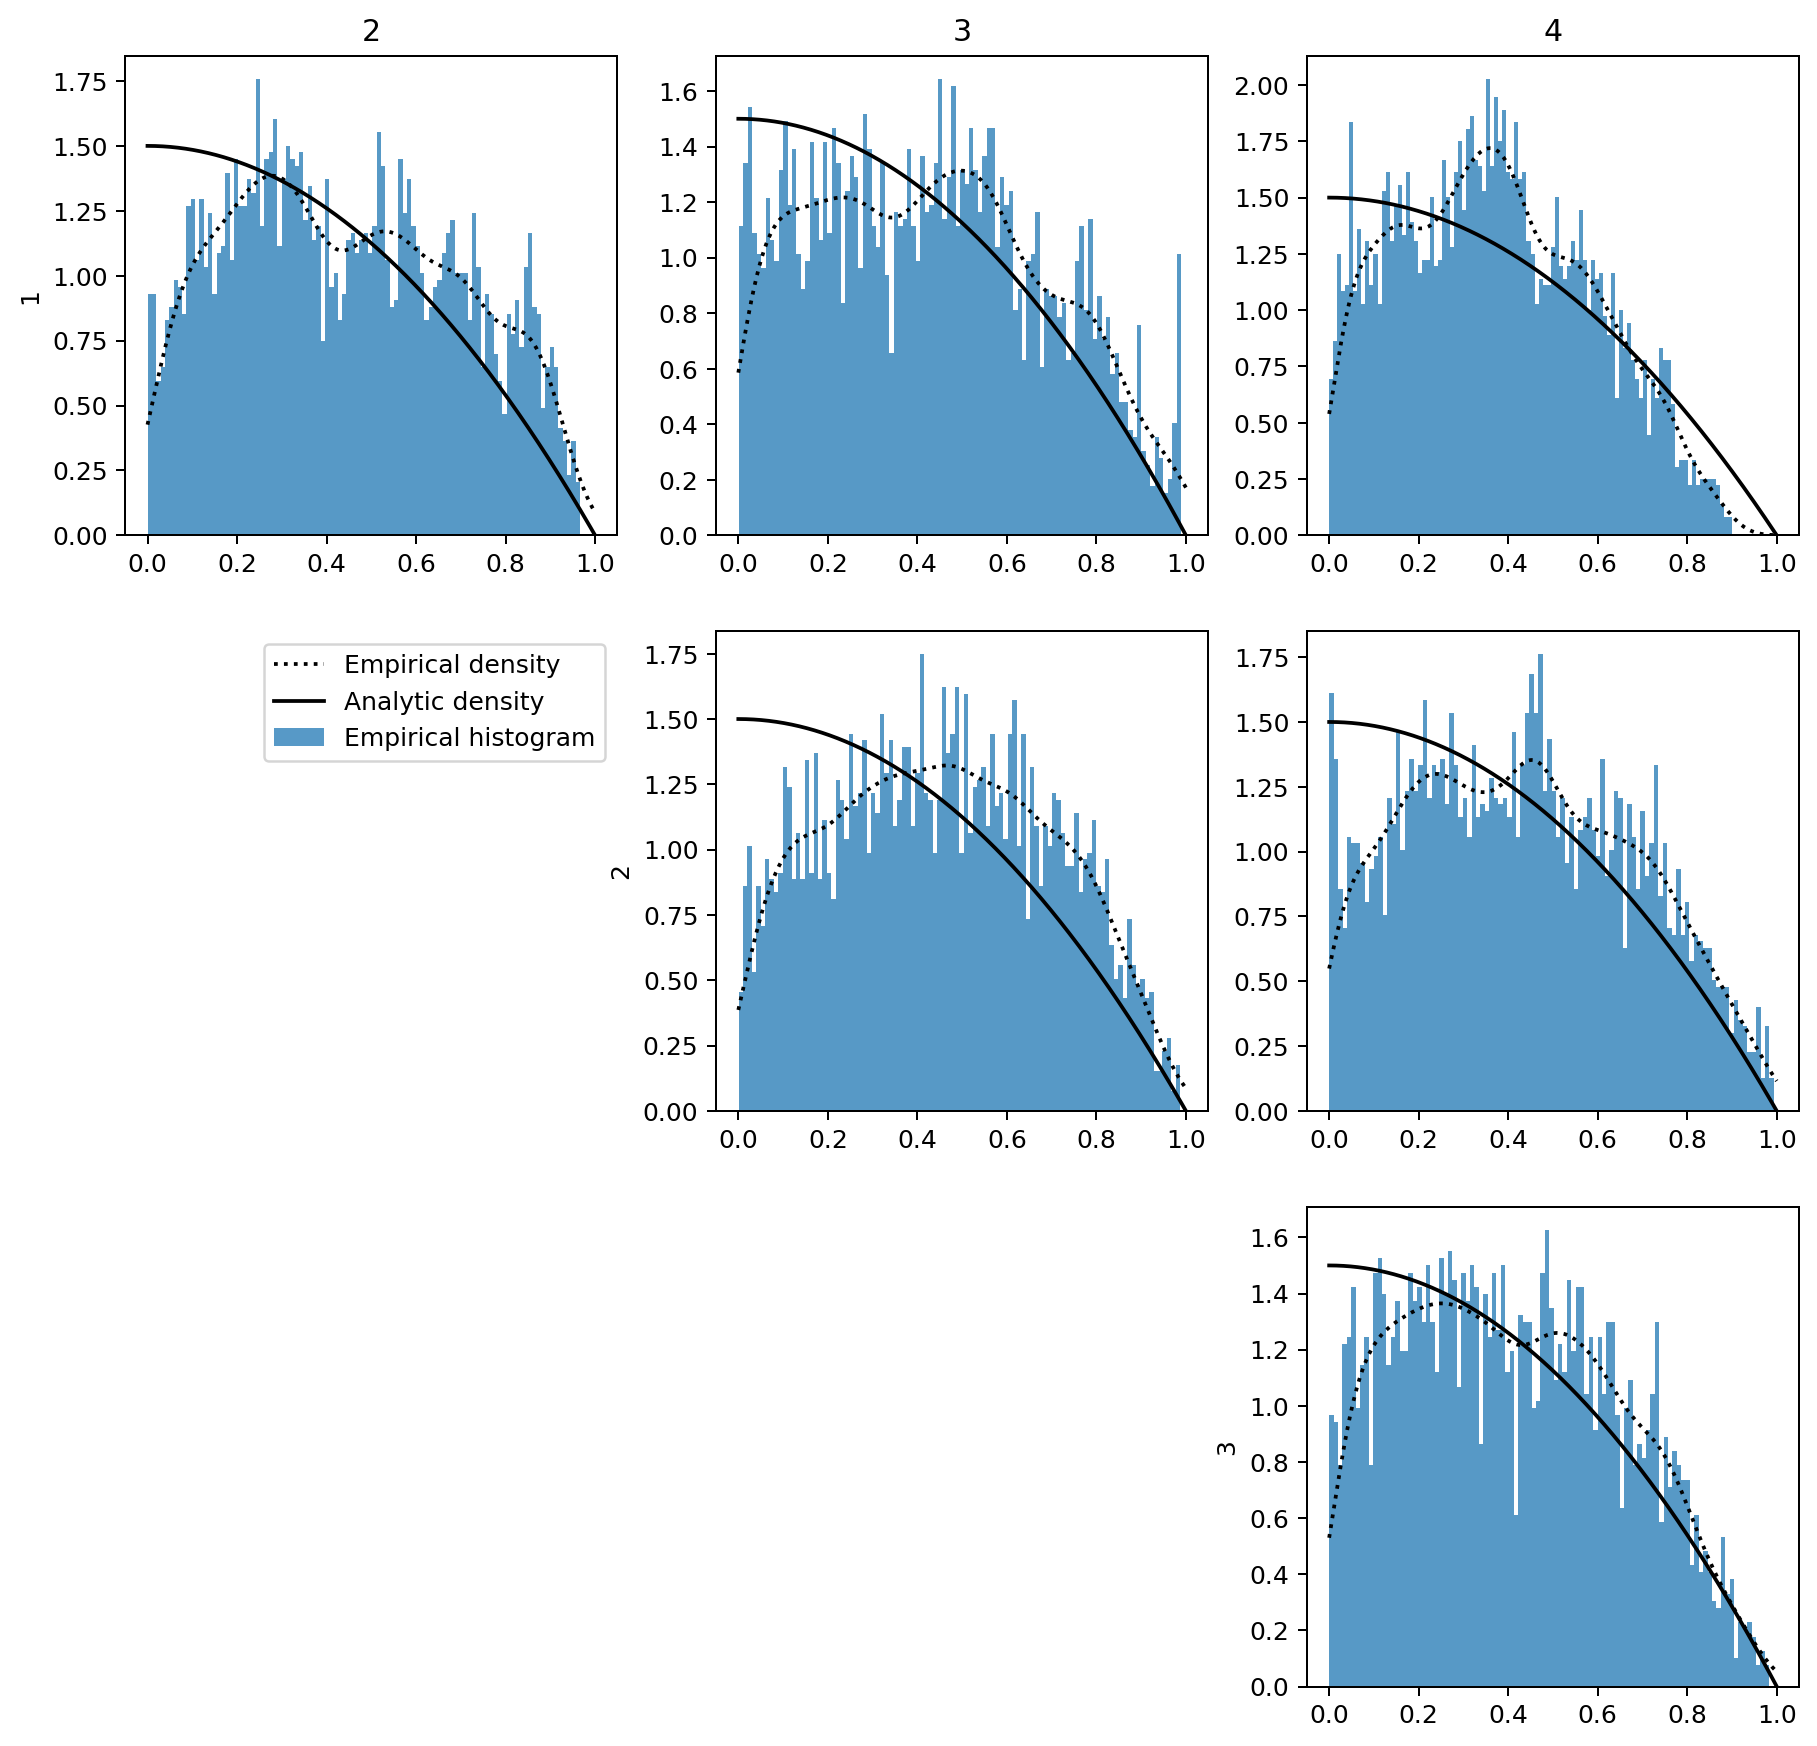

In [145]:
ax = plot_corrmat_samples(lkjcorrnonneg_stanfit_samples, 1, nonneg=True)

Given the repeated warnings of divergent transitions, and the marginal distribution of correlations, it seems like the HMC sampler was unable to explore the space close to the boundary of truncation. This looks similar to the samples from `LKJCorrRejection`, than to the samples from `LKCorrNonNeg`.

Next, we sample from the `TruncBetaMat` distribution, which should look as expected.

In [146]:
truncbetamat_stanfit = infer_mvn_cov(truncbeta=True)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_7a4d42699e572c6b44a0e1f3de190134 NOW.


In [147]:
truncbetamat_stanfit_samples = stanfit2matrix(truncbetamat_stanfit, 4, label='Omega')

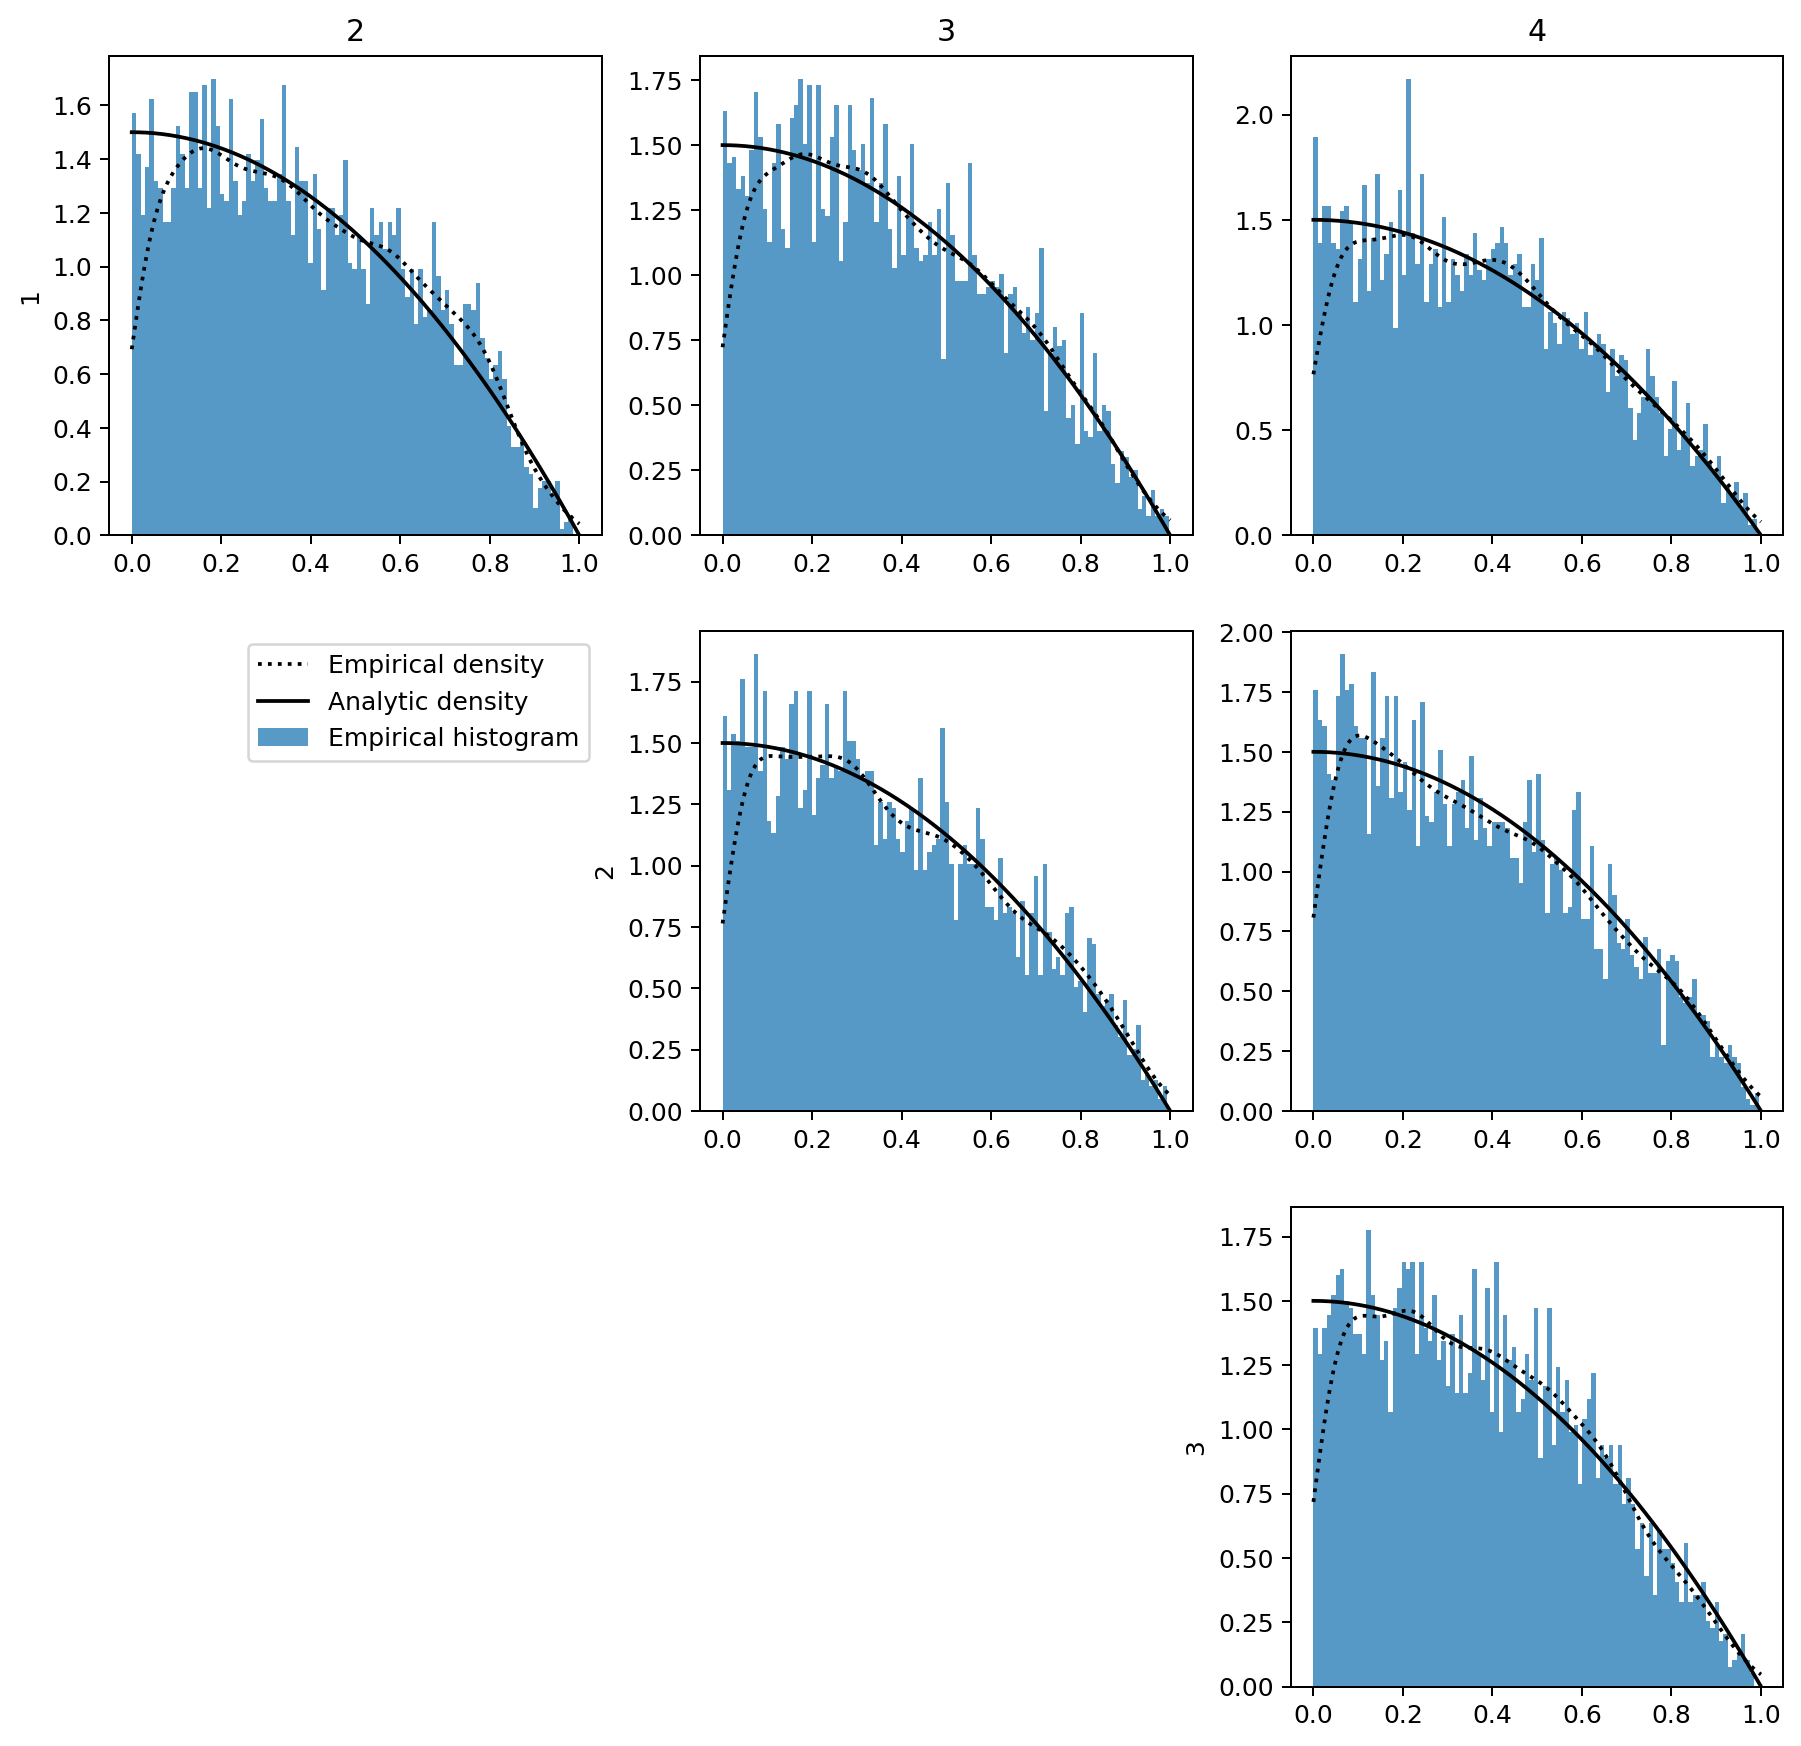

In [148]:
ax = plot_corrmat_samples(truncbetamat_stanfit_samples, 1, nonneg=True)

### Toy example: MVN features

As a simple toy example, we generate $100$ samples from an MVN with zero mean and a correlation matrix sampled from `LKJCorrNonNeg` with $k=4$, $\eta=1$, and infer the correlation matrix.

In [16]:
def generate_mvn_data(num_samples=100, corr=None, eta=1, k=4):
    from scipy.stats import multivariate_normal
    if corr is None: corr = LKJCorrNonNeg(eta=eta, k=k).rvs()
    return {'x': multivariate_normal(cov=corr).rvs(size=num_samples), 'corr': corr}

In [149]:
mvn_data = generate_mvn_data()

First, we infer using `TruncBetaMat`.

In [150]:
truncbetamat_mvn_stanfit = infer_mvn_cov(data=mvn_data, truncbeta=True)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_08db435cc2436d37d5fcff0bbcd54ef7 NOW.


In [151]:
truncbetamat_mvn_stanfit_samples = stanfit2matrix(truncbetamat_mvn_stanfit, 4, label='Omega')

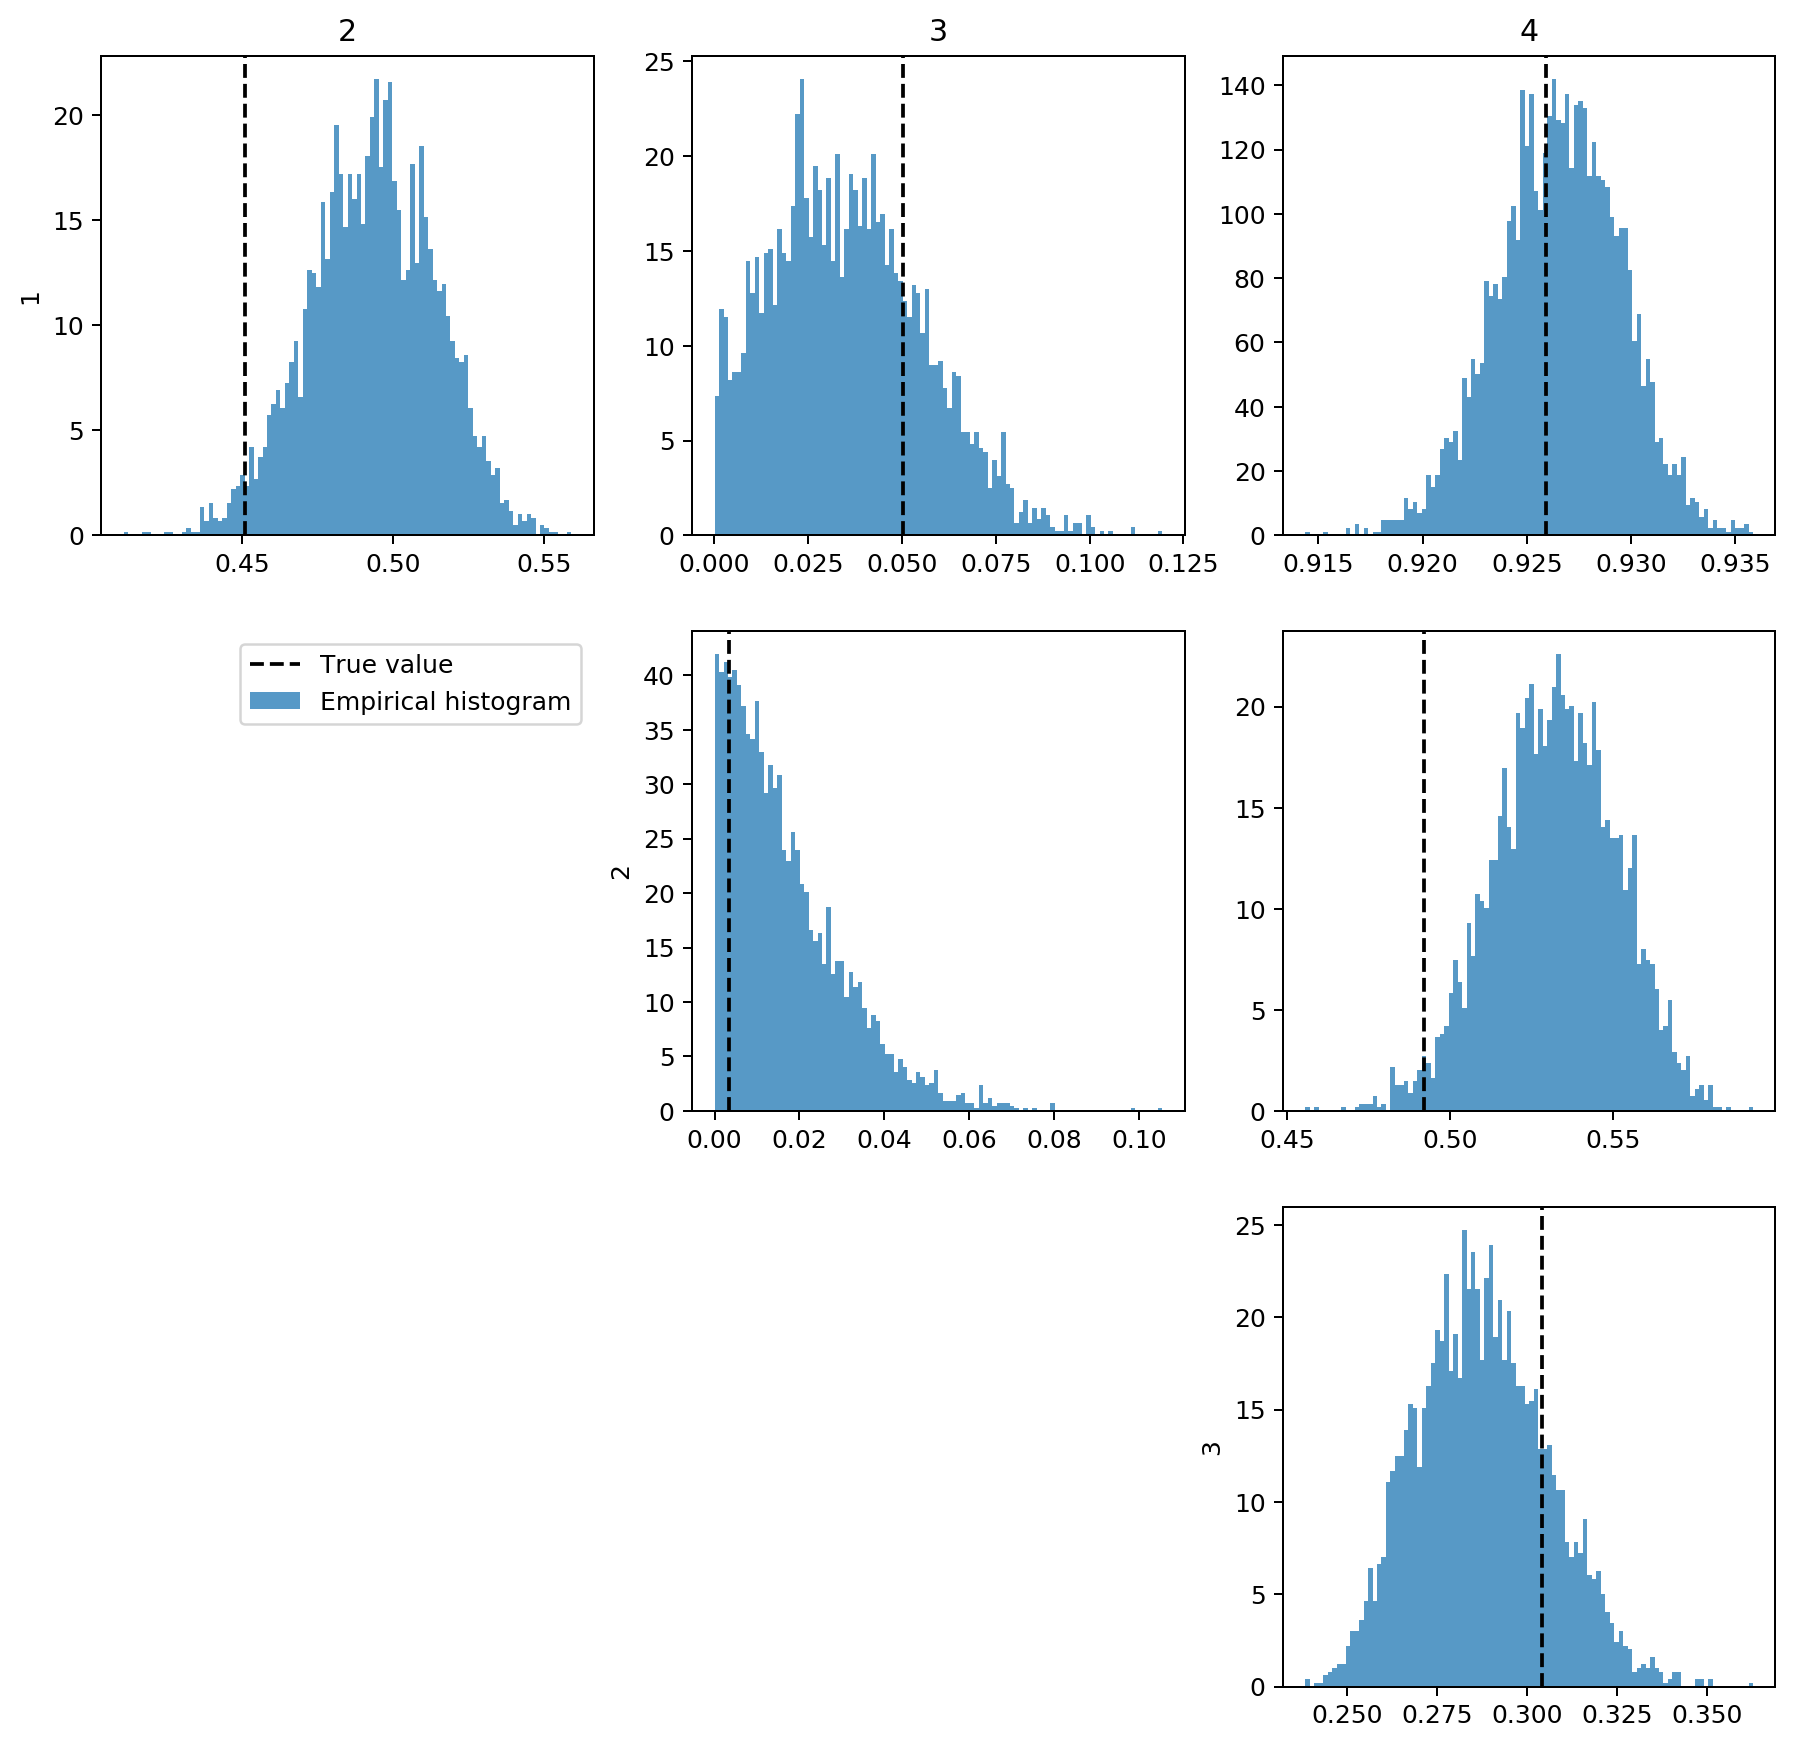

In [152]:
ax = plot_corrmat_samples(truncbetamat_mvn_stanfit_samples, corr=mvn_data['corr'])

Here, the sampler raises some warnings about rejected proposals due to the covariance for MVN not being positive-definite. However, the true values lies well within the posterior modes. Next, we infer using `LKJCorrNonNeg`.

In [153]:
lkjcorrnonneg_mvn_stanfit = infer_mvn_cov(data=mvn_data)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0bad17409bafb4de79ae38483932099c NOW.


In [154]:
lkjcorrnonneg_mvn_stanfit_samples = stanfit2matrix(lkjcorrnonneg_mvn_stanfit, 4, label='Omega')

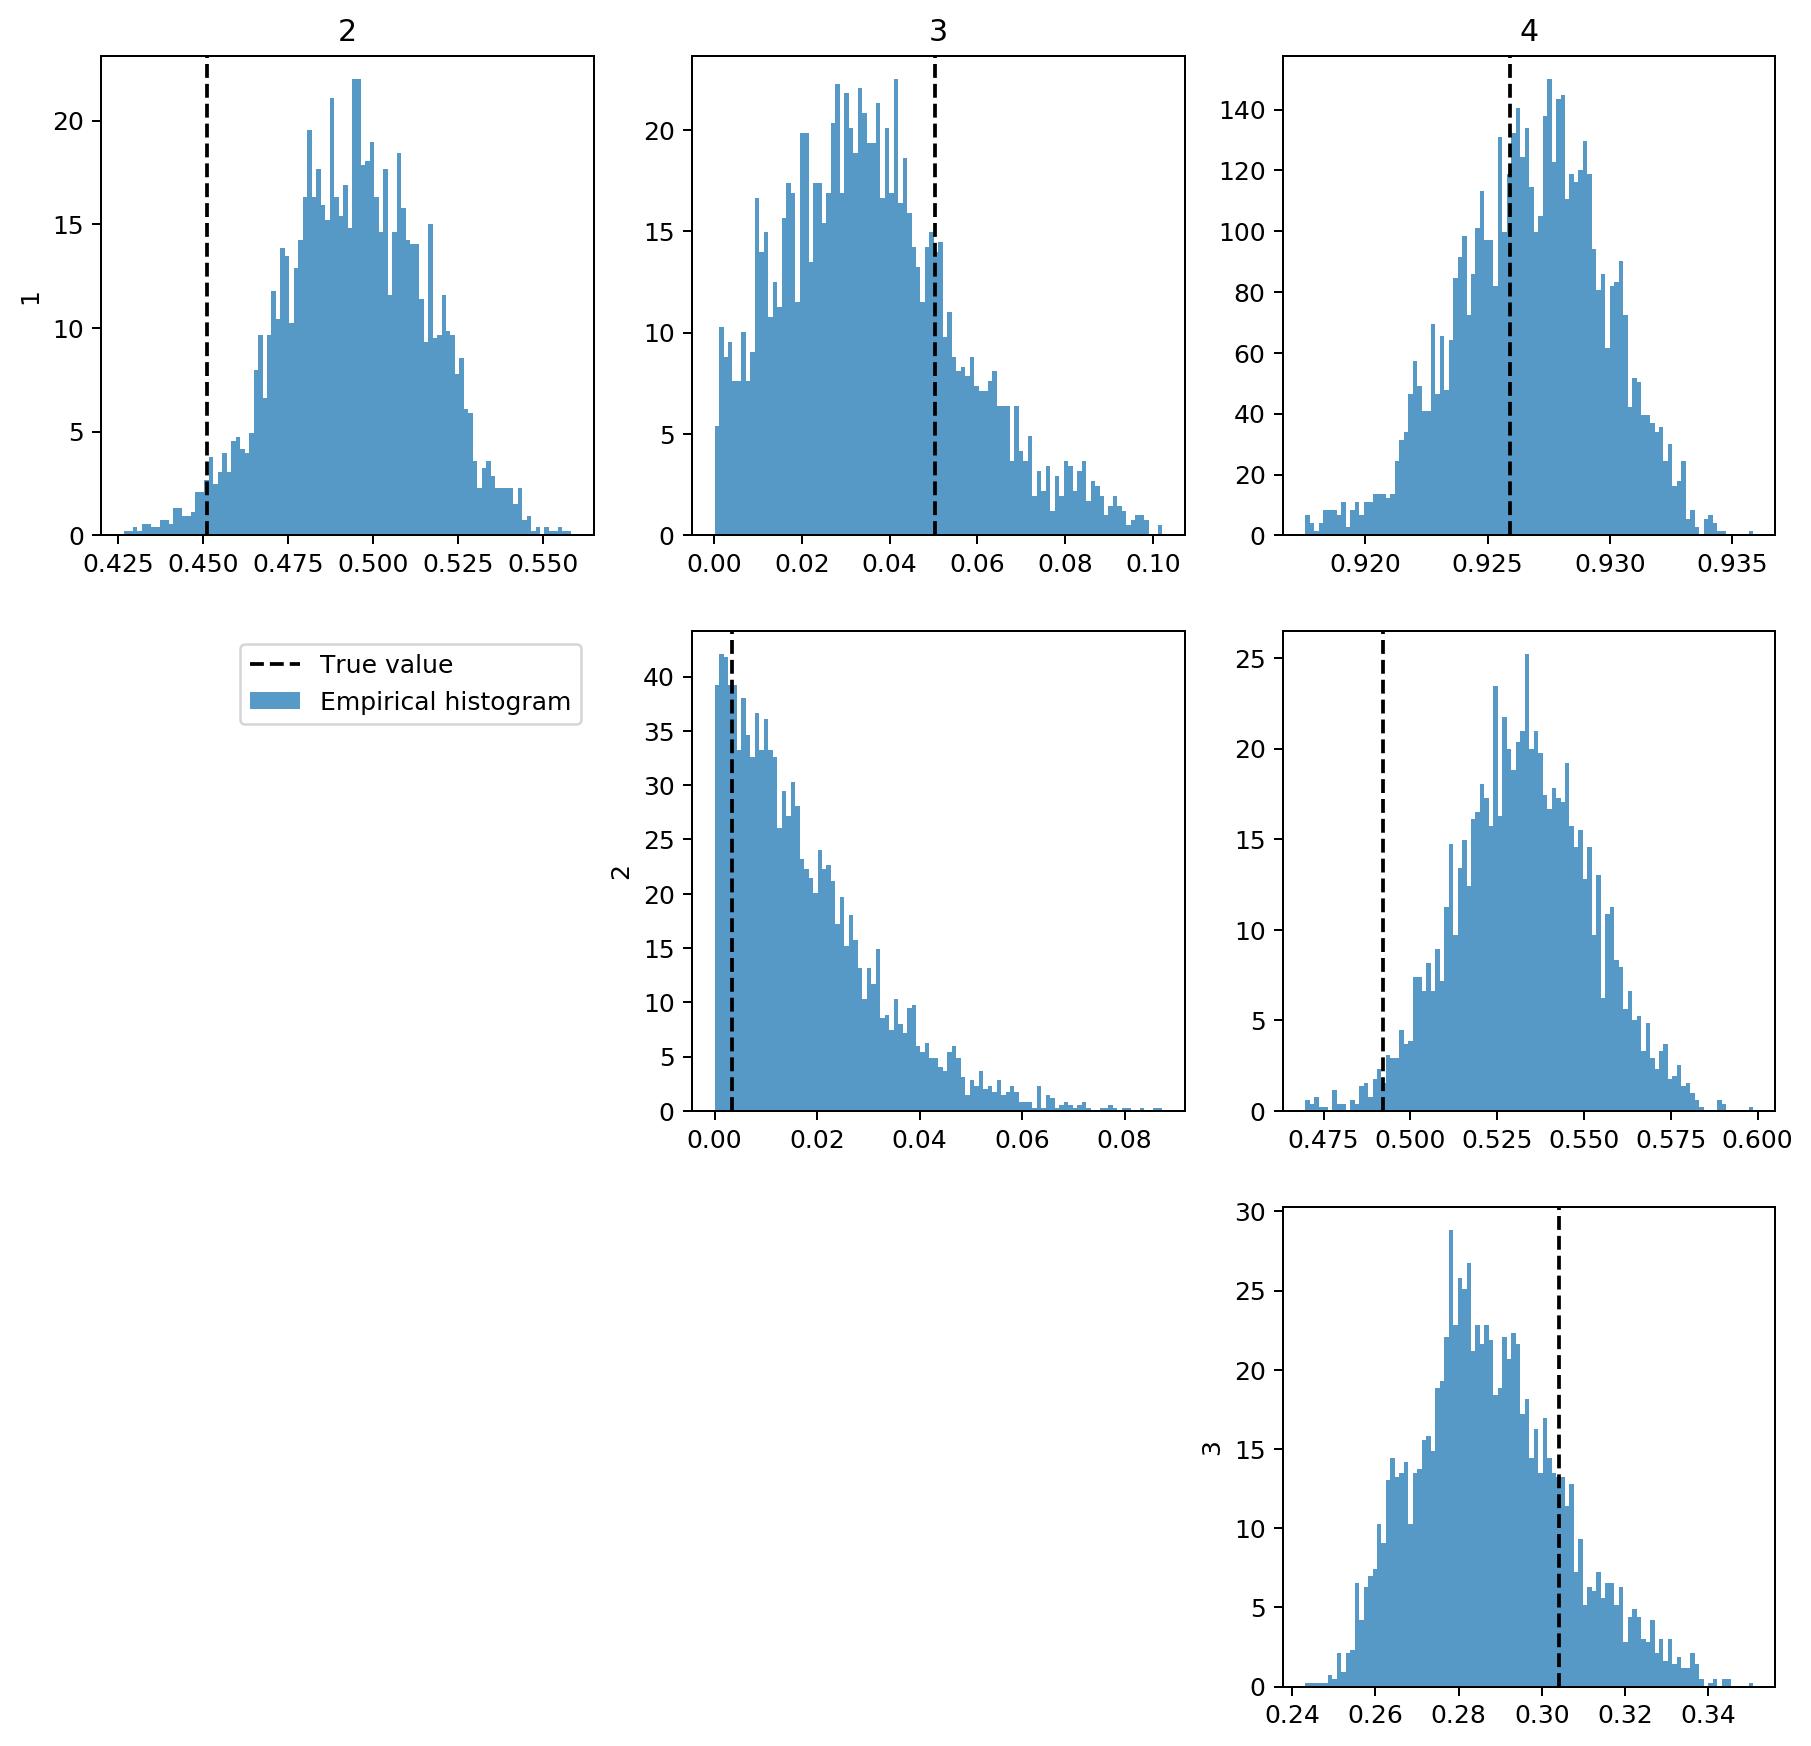

In [155]:
ax = plot_corrmat_samples(lkjcorrnonneg_mvn_stanfit_samples, corr=mvn_data['corr'])

Here, the sampler encounters divergent transitions again. But the posterior modes seem to agree with the true values.

## Summary

We have shown that enforcing homophily during inference of the social kernel is the same as imposing a decomposition of the block matrix into variance-correlation matrices, which also motivates the measure of social Gini with the self-affinity null model. This requires determining a prior distribution on non-negative valued positive semi-definite matrices.

We have considered two possible prior distributions with a single parameter $\eta$ that (roughly) controls the level of homophily. The `TruncBetaMat` distribution produces a block matrix which permits a small amount of heterophily to creep in for small $\eta$, but it is straightforward to implement in `stan`. The `LKJCorrNonNeg` distribution is precisely over non-negative valued positive semi-definite matrices, but is tricker to sample from in `stan`. It might be worth thinking of a reparametrization here than can be helpful.

## Ordering constraint

There can be some Blau dimensions like age and income which have ordering of groups, say young to old, or low to high income. Here, we may consider the homophily constraint to also include an ordering constraint, that groups next to each other in the ordering have a higher likelihood to connect than groups further apart.

In [610]:
class LKJCorrNonNegOrd(LKJCorr):
    # defines a distribution over non-negative correlation matrices via a modified vine method
    def __init__(self, k=2, eta=1, name='LKJ_correlation_nonnegative_ordinal'):
        LKJCorr.__init__(self, k, eta, name)
        
    def rvs(self, size=1):
        import numpy as np
        if size>1: return np.array([self.rvs() for i in range(size)])
        def get_pc_constrained(idx, i, j, min_val=0, max_val=1):
            # sample a partial correlation given constraints over the total correlation
            factor = 0.
            clip = 0.
            # estimate clipping point of partial correlation
            for l in range(idx-1, 0, -1):
                factor += 0.5*(np.log2(1-pcorr[l, i]**2)+np.log2(1-pcorr[l, j]**2))
                clip -= pcorr[l, i]*pcorr[l, j]*np.exp2(-factor)
            clip_a = min_val*np.exp2(-factor) + clip
            clip_b = max_val*np.exp2(-factor) + clip
            # every partial correlation is beta-distributed over [clip_a, clip_b], thus conditioned on previous entries of the pcorr matrix
            pc = truncbeta(beta, beta, max(-1, clip_a), min(1, clip_b)).rvs()
            c = pc
            for l in range(idx-1, 0, -1):
                c = c*np.sqrt((1-pcorr[l, i]**2)*(1-pcorr[l, j]**2)) + pcorr[l, i]*pcorr[l, j]
            return pc, c
        while True:
            try:
                # generate permutation *first* to make it permutation invariant, since we cannot permutate the columns to obey ordering
                order = np.random.permutation(self.k) # generate vine-order
                idx_to_grp = {i+1:order[i]+1 for i in range(self.k)}
                # print('idx2grp: ', idx_to_grp)
                grp_to_idx = {order[i]+1: i+1 for i in range(self.k)} # maps groups to vine-order index
                pcorr = np.zeros((self.k+1, self.k+1)) # initialize the partial correlation matrix
                corr = np.eye(self.k) # correlation matrix
                beta = self.eta + (self.k-1)/2
                for idx in range(1, self.k):
                    beta -= 1/2
                    i = idx_to_grp[idx]
                    # go through subsequent groups
                    for j in range(i+1, self.k+1):
                        if grp_to_idx[j]<=idx: # already estimated corr[i-1,j-1]=corr[j-1,i-1] --> ignore
                            pass
                        else:
                            if j<self.k: lower_row = corr[i-1, j] # ensure index doesn't wrap around
                            else: lower_row = 0.
                            upper_row = corr[i-1, j-2]
                            if i>1: lower_col = corr[i-2, j-1]
                            else: lower_col = 0.
                            if grp_to_idx[i+1]<idx and i<self.k: upper_col = corr[i, j-1] # if already filled
                            else: upper_col = 1.
                            lower = max(lower_row, lower_col)
                            upper = min(upper_row, upper_col)
                            # print('>>', i, j, lower, upper)
                            pc, c = get_pc_constrained(idx, i, j, lower, upper)
                            pcorr[idx, j] = pc # store partial correlations by vine-order x group-order
                            corr[i-1, j-1] = c
                            corr[j-1, i-1] = c
                            # print('>>', i, j, c, lower, upper)
                    # go through preceeding groups
                    for j in range(i-1, 0, -1):
                        if grp_to_idx[j]<=idx: # already estimated corr[i-1,j-1]=corr[j-1,i-1] --> ignore
                            pass
                        else:
                            if j>1: lower_row = corr[i-1, j-2]
                            else: lower_row = 0.
                            upper_row = corr[i-1, j]
                            if i<self.k: lower_col = corr[i, j-1]
                            else: lower_col = 0.
                            if grp_to_idx[i-1]<idx and i>1: upper_col = corr[i-2, j-1] # if already filled
                            else: upper_col = 1.
                            lower = max(lower_row, lower_col)
                            upper = min(upper_row, upper_col)
                            # print('>>', i, j, lower, upper)
                            pc, c = get_pc_constrained(idx, i, j, lower, upper)
                            pcorr[idx, j] = pc # store partial correlations by vine-order x group-order
                            corr[i-1, j-1] = c
                            corr[j-1, i-1] = c
                            # print('>>', idx, i, j, c, lower, upper)
                break
            except ValueError: # unable to satisfy positivity *and* ordering --> resample entire correlation matrix
                continue
        return corr

In [611]:
rv_lkjcnno = LKJCorrNonNegOrd(4)

In [612]:
tmp = rv_lkjcnno.rvs(8000)

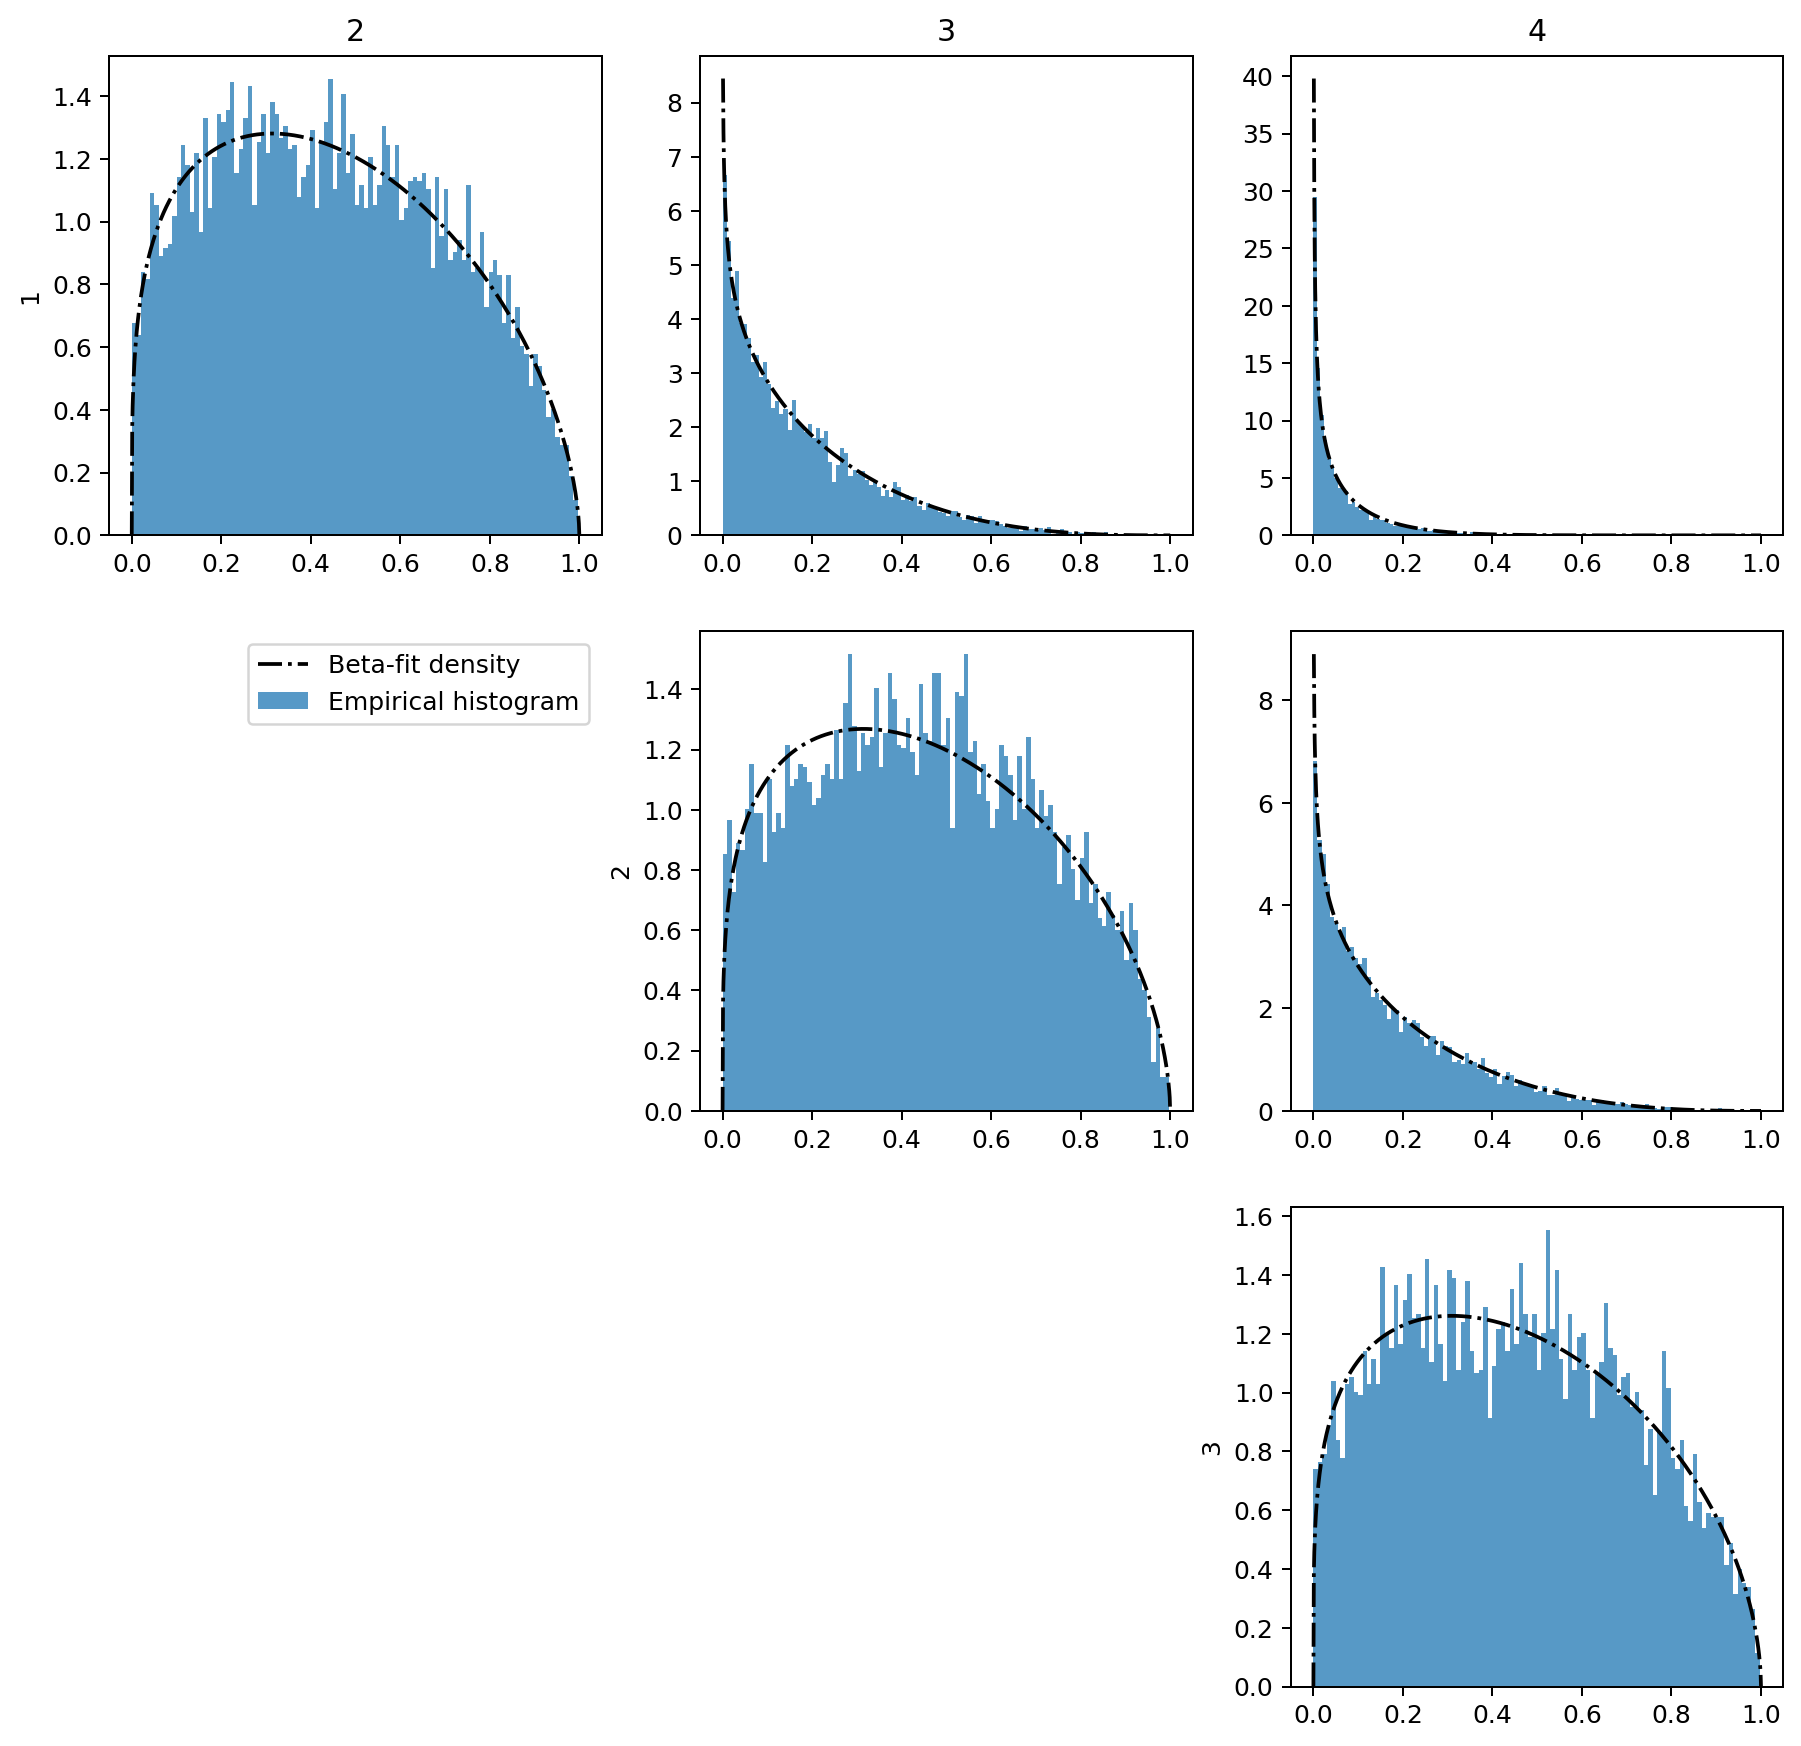

In [662]:
ax = plot_corrmat_samples(tmp, nonneg=True, fit_beta=True)

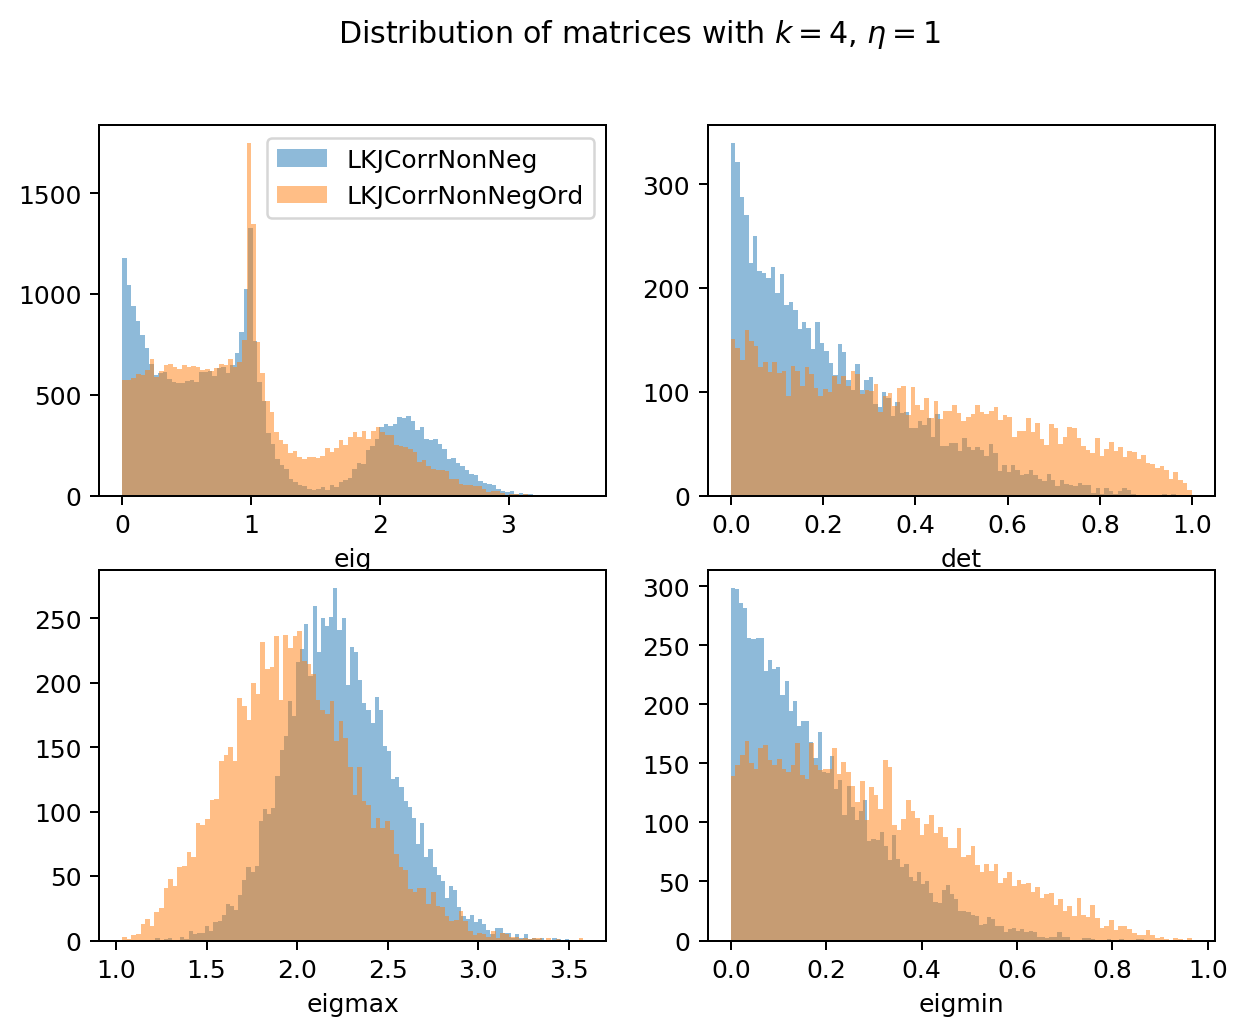

In [614]:
ax = spectral_distribution(samples=[rv_lkjcnn_samples, tmp],
                           labels=['LKJCorrNonNeg', 'LKJCorrNonNegOrd'],
                           eta=1,
                           bins=100)